# About Dataset

We need to uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1. 'Below College'  2. 'College'    3. 'Bachelor'       4. 'Master'     5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'            2. 'Medium'     3. 'High'           4. 'Very High'

JobInvolvement
1. 'Low'            2. 'Medium'     3. 'High'           4. 'Very High'

JobSatisfaction
1. 'Low'            2. 'Medium'     3. 'High'           4. 'Very High'

PerformanceRating
1. 'Low'            2. 'Good'       3. 'Excellent'      4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'            2. 'Medium'     3. 'High'           4. 'Very High'

WorkLifeBalance
1. 'Bad'            2. 'Good'       3. 'Better'         4. 'Best'

# 1. Importing importent Librarys

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

# 2. Loading Dataset

In [55]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis="columns", inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# 3. Checking Dataset

We are cheking dataset for missing values and data types of columns. We are also checking the distribution of target variable.

## 3.1 Checking Missing Value

Conslusion:-> There is no missing value in the dataset

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [57]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [58]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<Axes: >

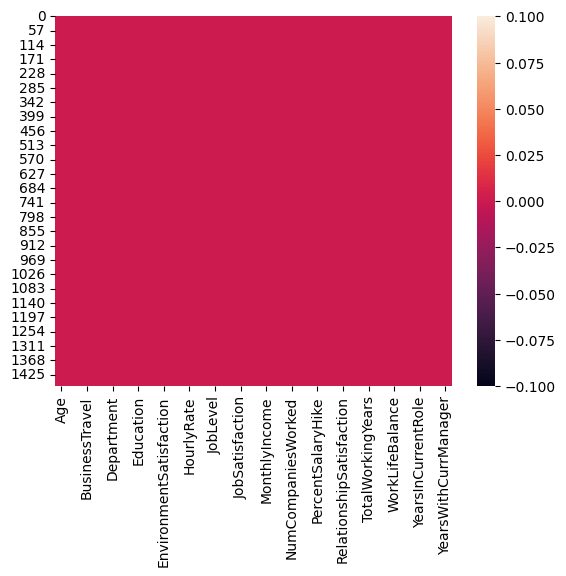

In [59]:
sns.heatmap(df.isnull())

## 3.2 Check duplicates
Conclusion:-> There is no duplicate value present in Dataset

In [60]:
df.duplicated().sum()

0

## 3.3 Checking Imbalance in Dataset
Consusion:-> There are less people who are leaving company compare who are satying<br>
Attrition<br>
No ->      83.8776%<br>
Yes ->    16.1224%<br>

In [61]:
# Get numbers of people who left vs. stayed

print(df['Attrition'].value_counts())
print()

# Get percentages of people who left vs. stayed

print(df['Attrition'].value_counts(normalize=True))

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


## 3.4 Insite in numerical data and catogrical data

Conclusion:->

In [62]:
# Numerical columns
num_data = df.select_dtypes(include=["int64","float64"])
print("numerical columns: ",num_data.columns)

numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### 3.4.2 Cotegirical Columns
Conclusion:->
1. BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']<br>
Travel_Rarely        70.952381<br>
Travel_Frequently    18.843537<br>
Non-Travel           10.204082<br>
2. Department ['Sales' 'Research & Development' 'Human Resources']<br>
Research & Development    65.374150<br>
Sales                     30.340136<br>
Human Resources            4.285714<br>
3. EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']<br>
Life Sciences       41.224490<br>
Medical             31.564626<br>
Marketing           10.816327<br>
Technical Degree     8.979592<br>
Other                5.578231<br>
Human Resources      1.836735<br>

In [63]:
# Categorical columns
cat_data = df.select_dtypes(include=['object'])
print("categorical columns: ",cat_data.columns)

categorical columns:  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [64]:
for i in cat_data:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print(df[i].value_counts(normalize=True)*100)
    print("*"*76)

Attrition ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64
****************************************************************************
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: proportion, dtype: float64
****************************************************************************
Department ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64
*****************

## 3.4 Checking outliers
Conclusion:->

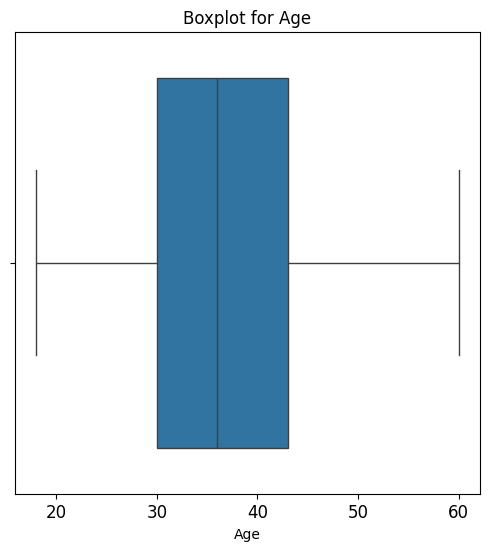

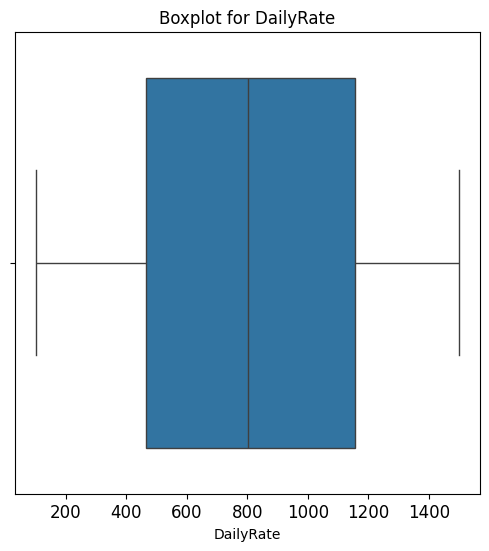

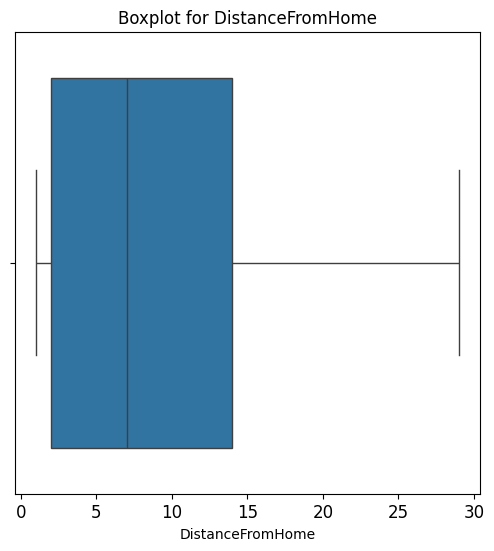

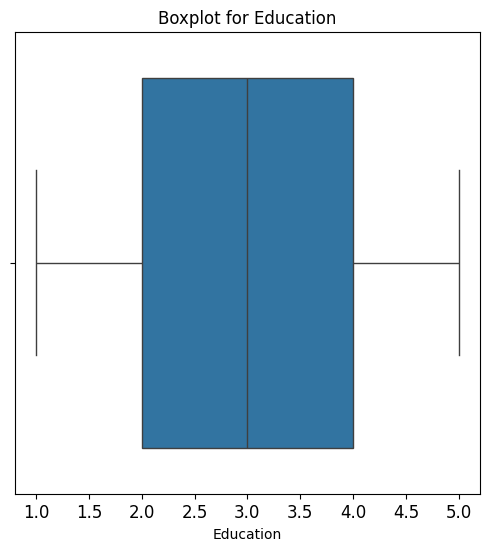

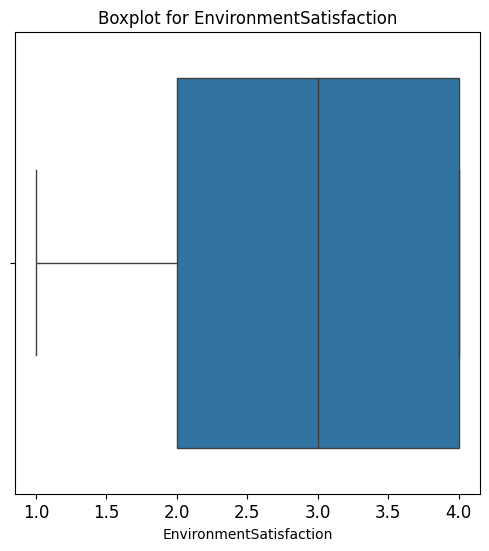

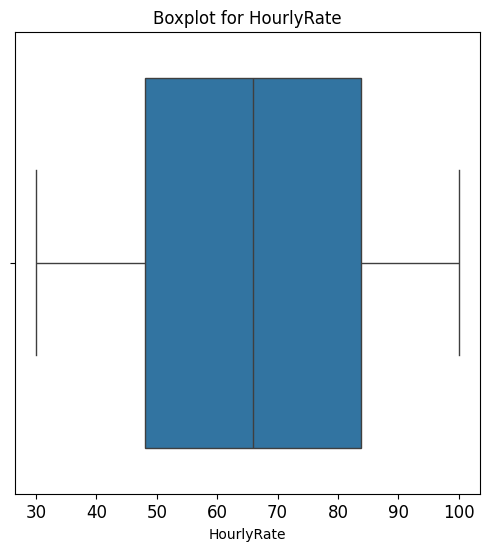

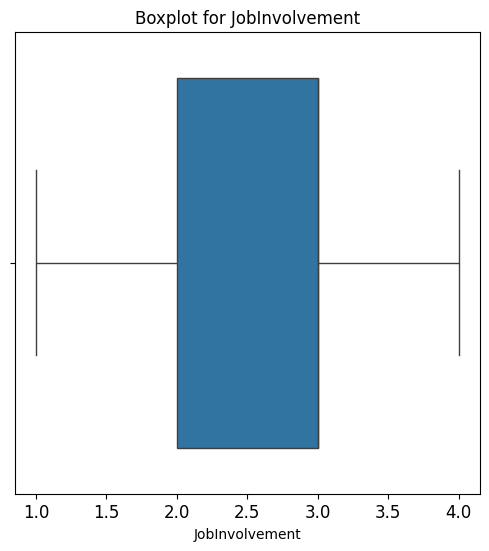

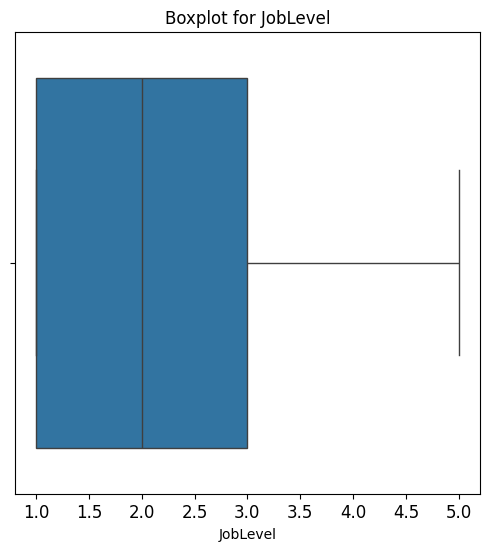

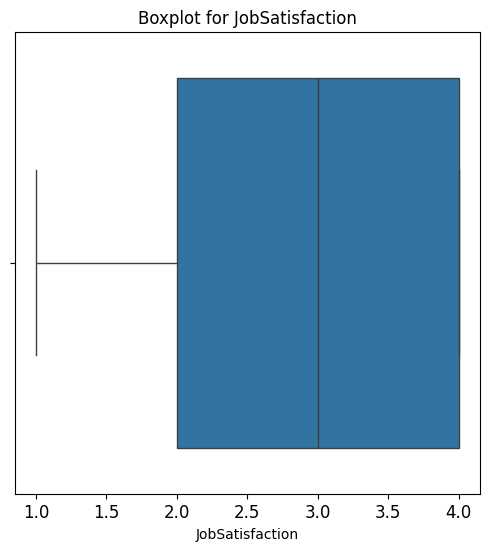

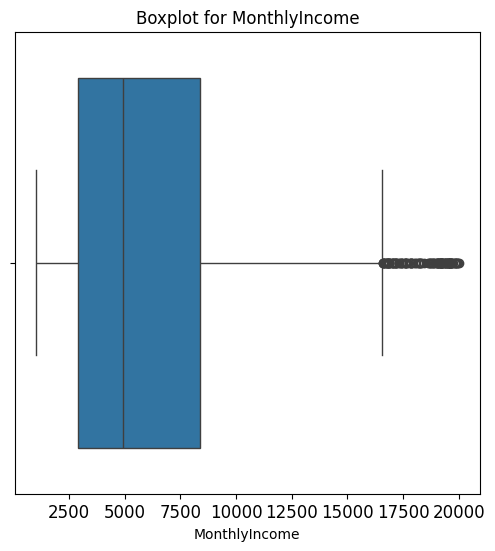

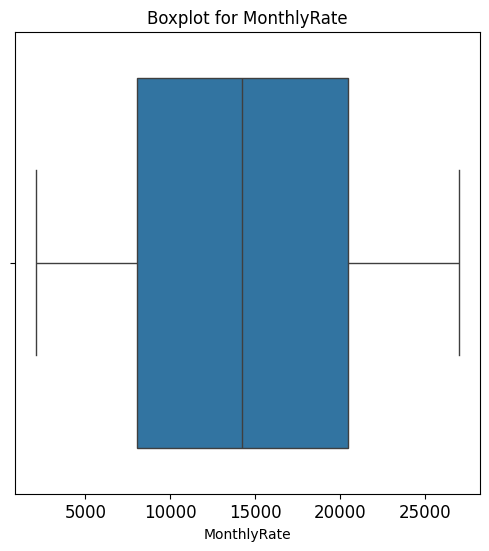

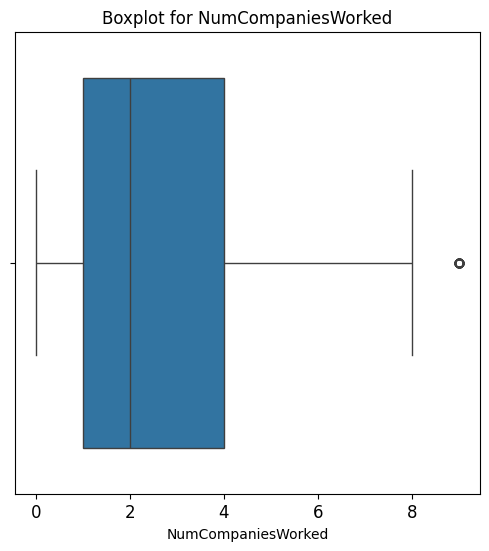

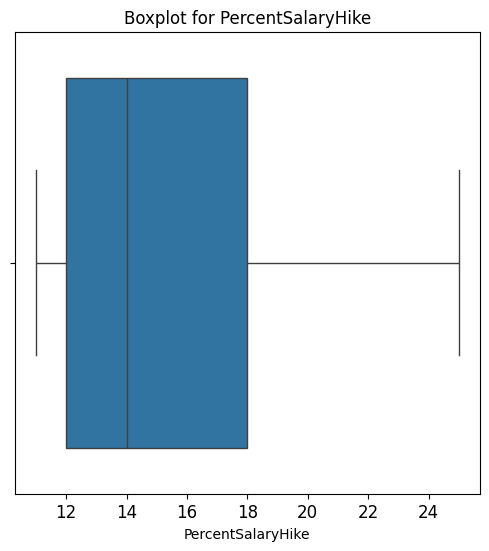

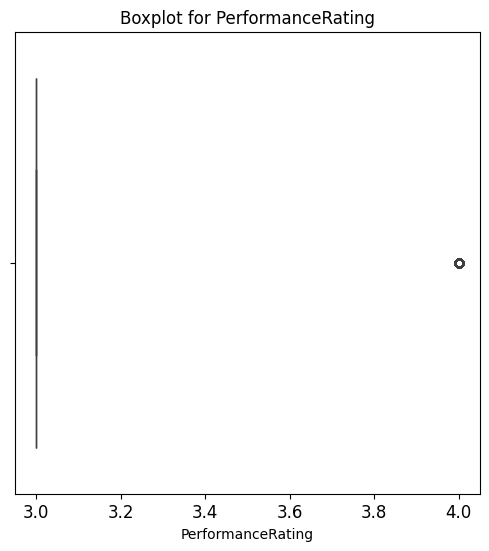

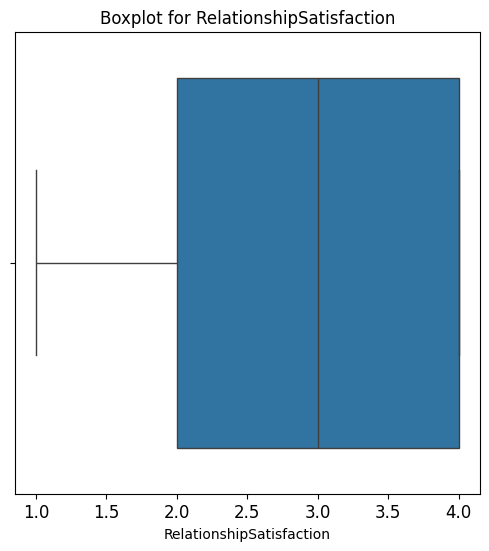

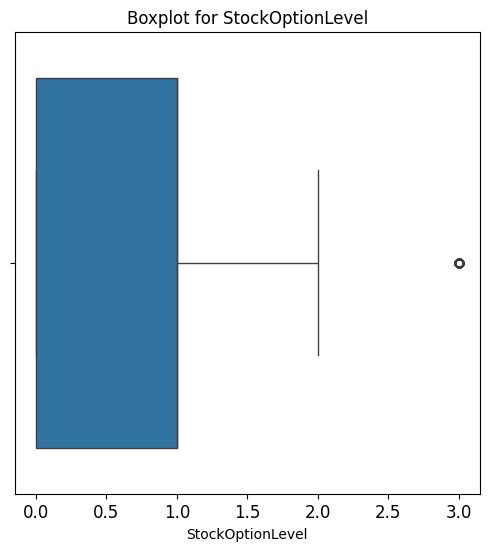

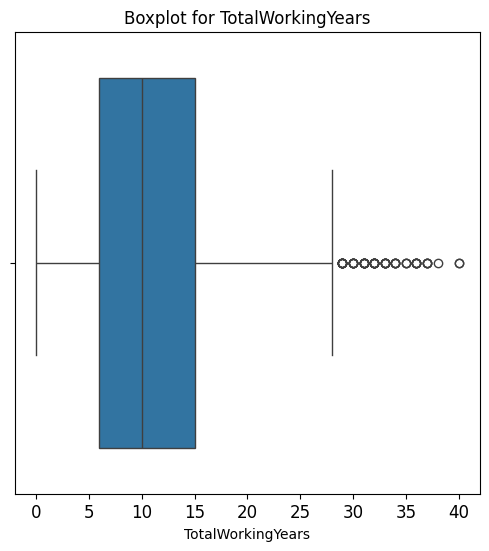

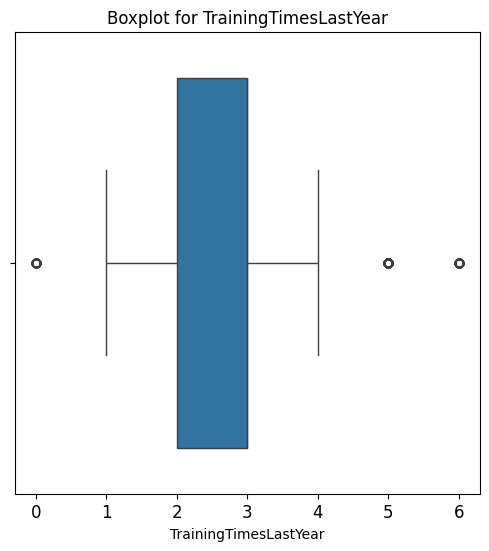

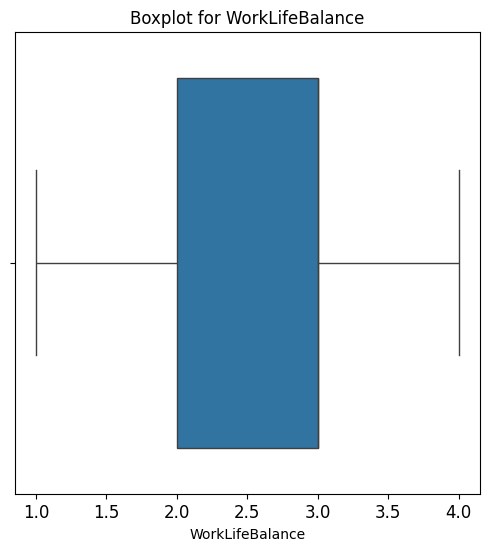

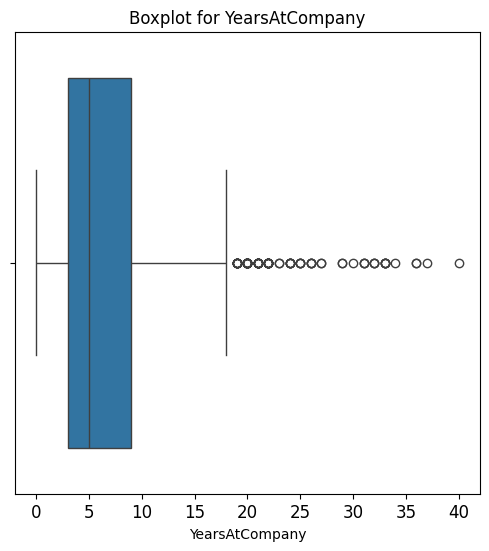

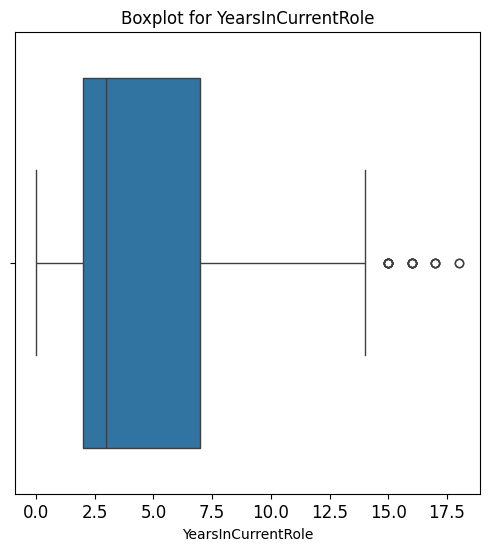

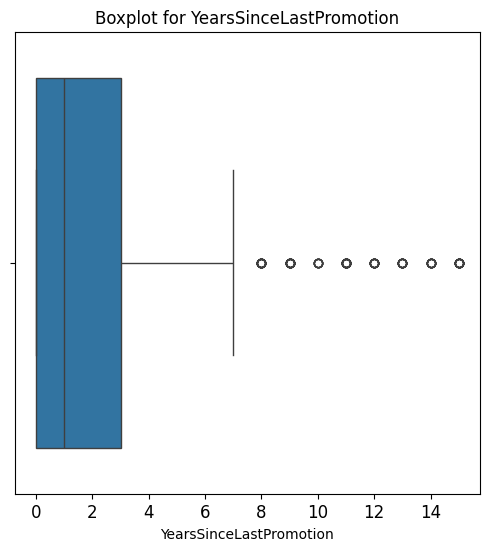

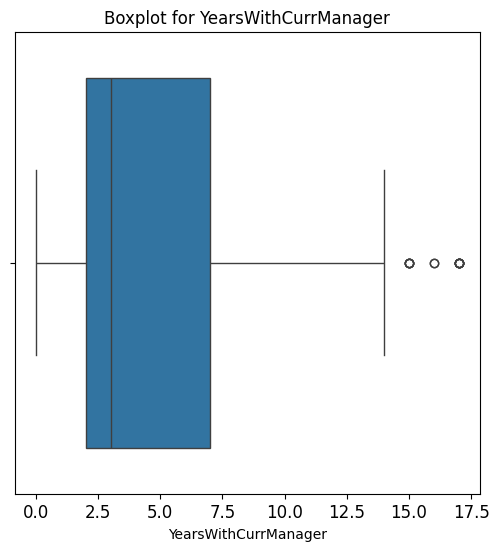

In [65]:
for col in num_data:
    plt.figure(figsize=(6,6))
    plt.title(f'Boxplot for {col}', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.boxplot(x=df[col])
    plt.show()

# 4. Exploratory Data Analysis

## 4.1 Univariate Analysis

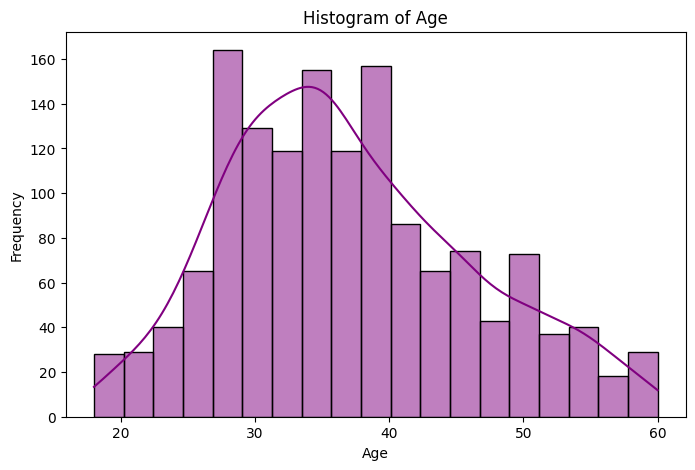

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

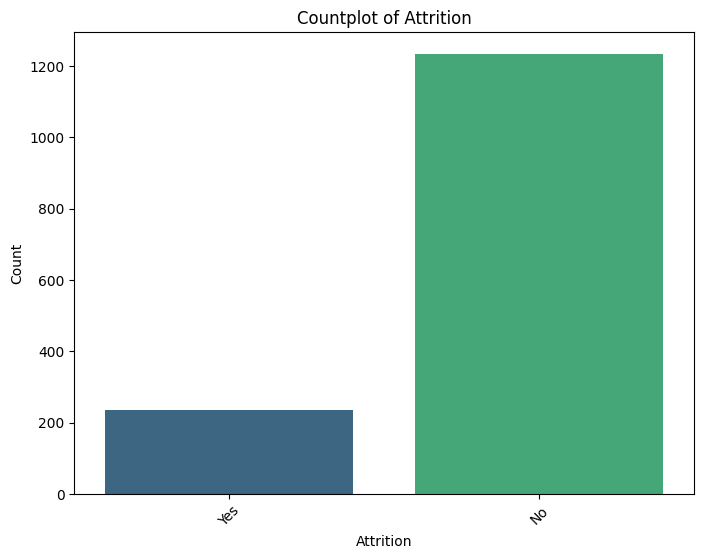

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


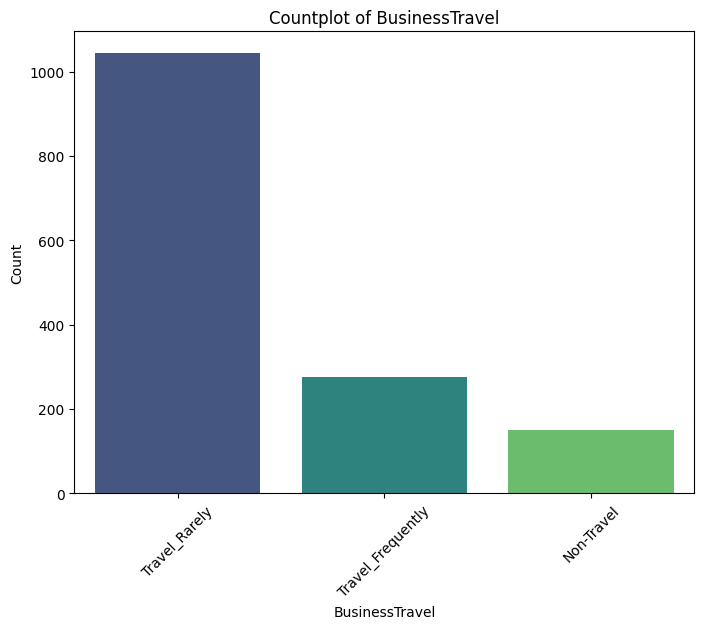

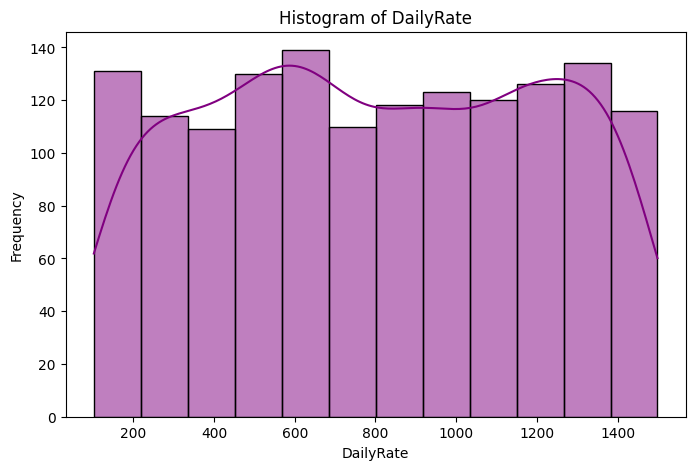

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

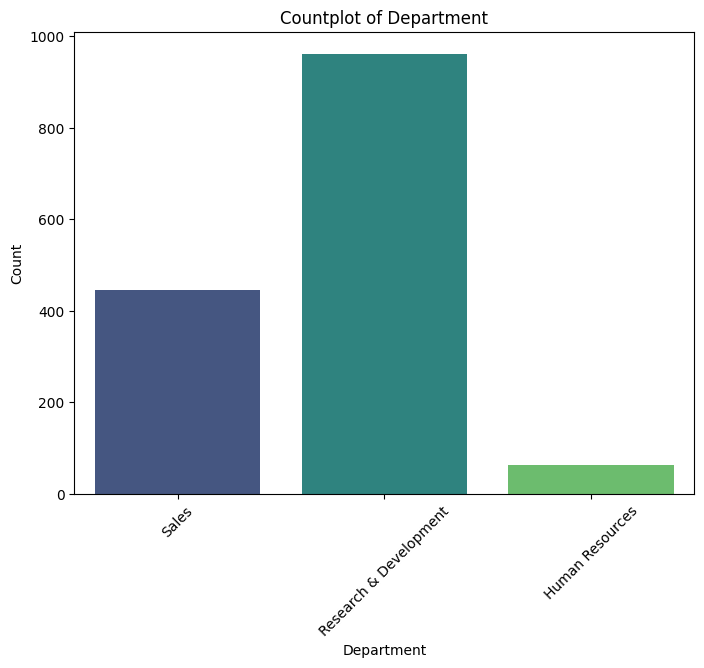

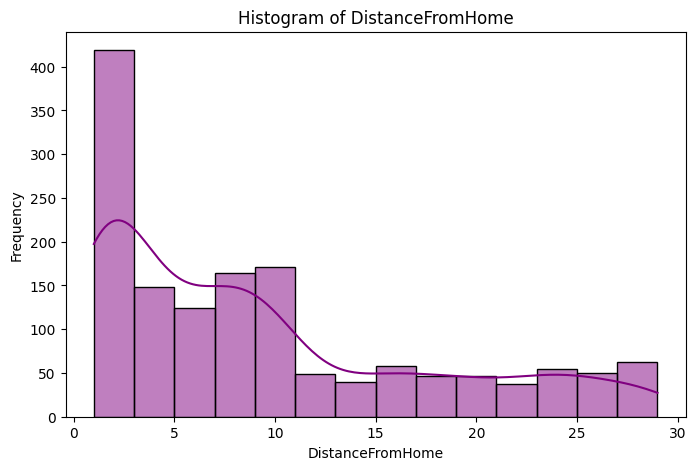

<Figure size 640x480 with 0 Axes>

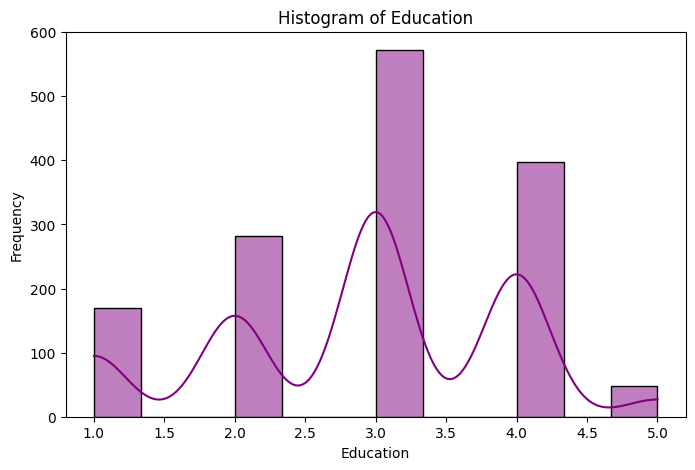

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

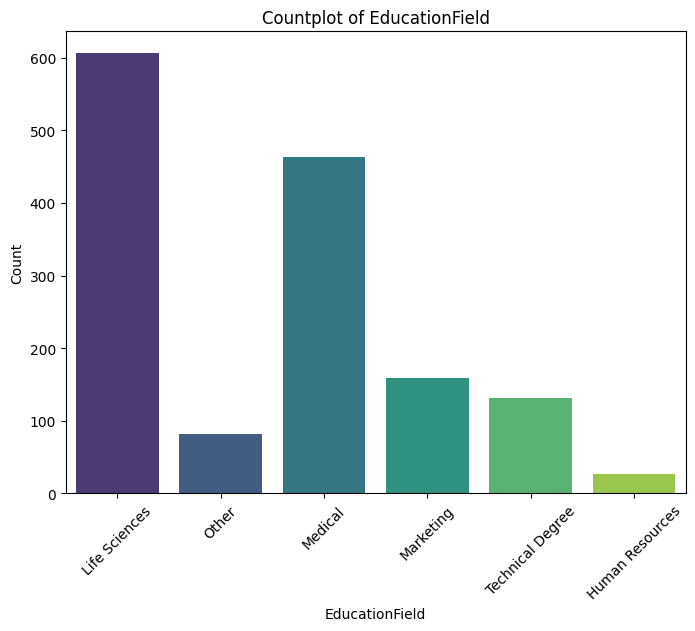

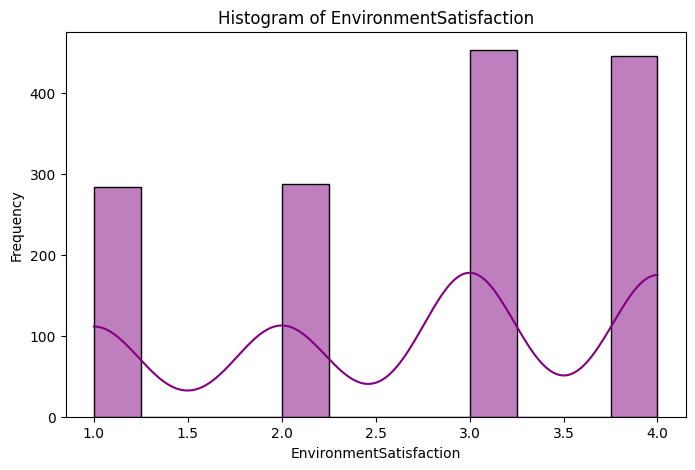

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

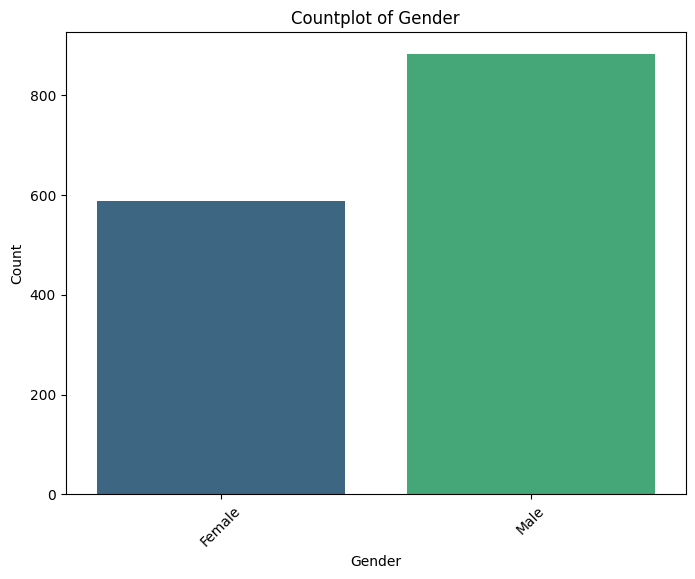

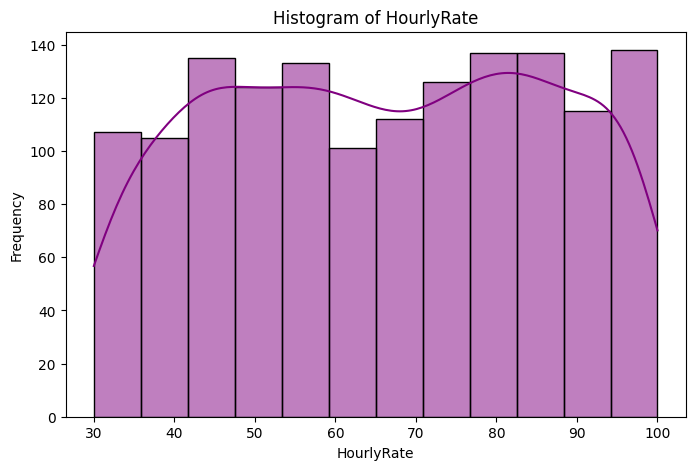

<Figure size 640x480 with 0 Axes>

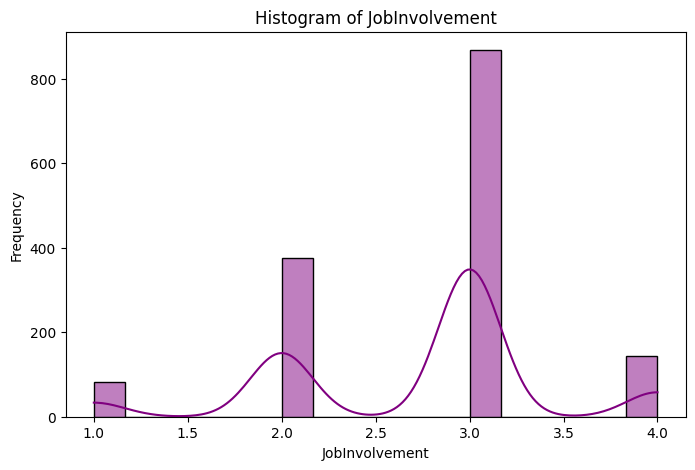

<Figure size 640x480 with 0 Axes>

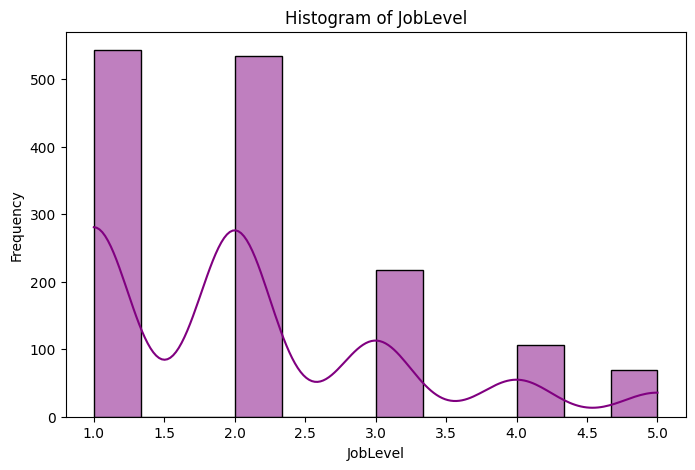

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

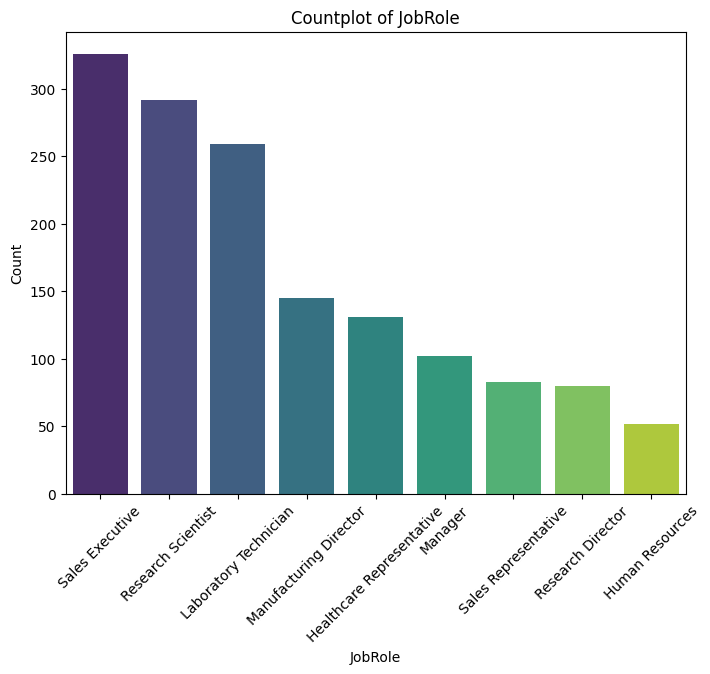

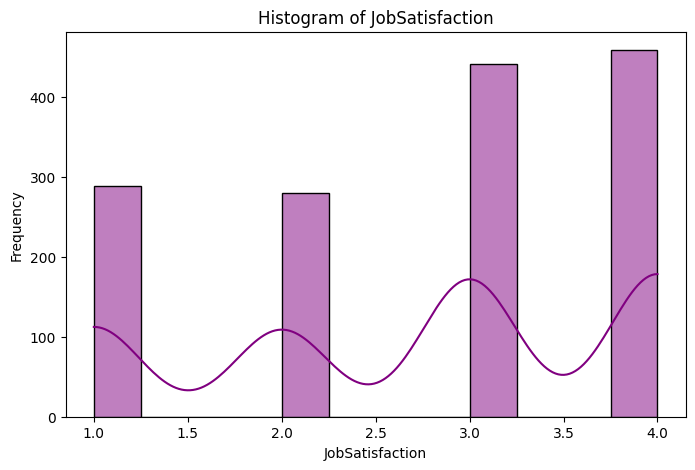

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

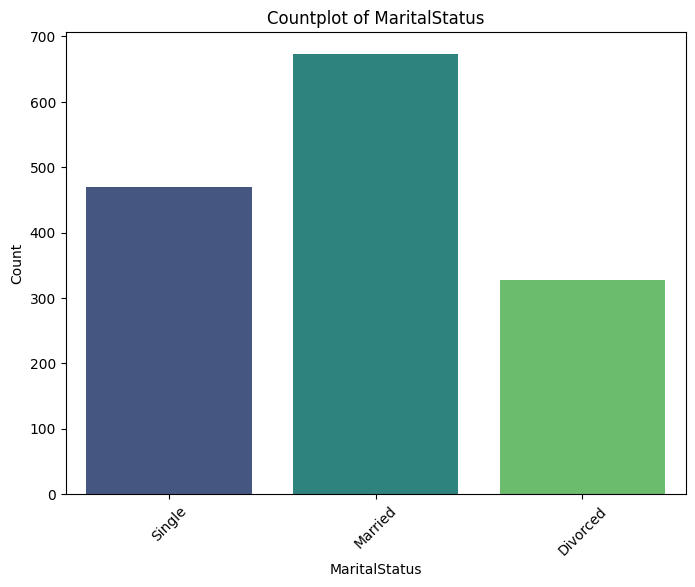

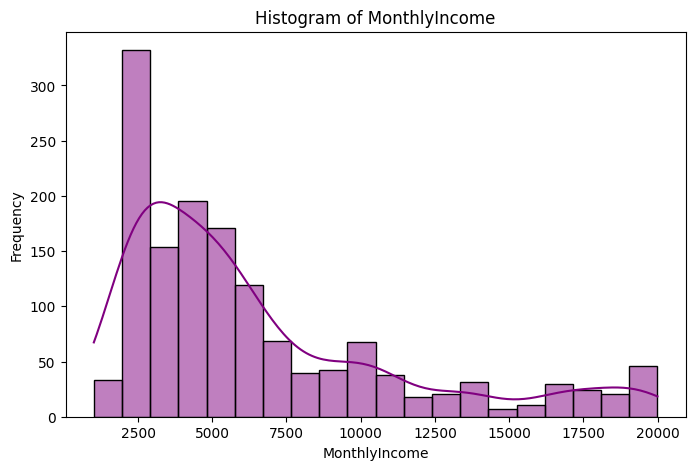

<Figure size 640x480 with 0 Axes>

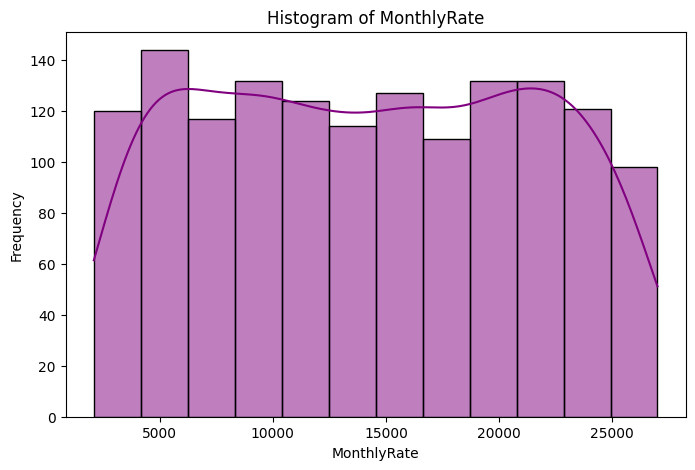

<Figure size 640x480 with 0 Axes>

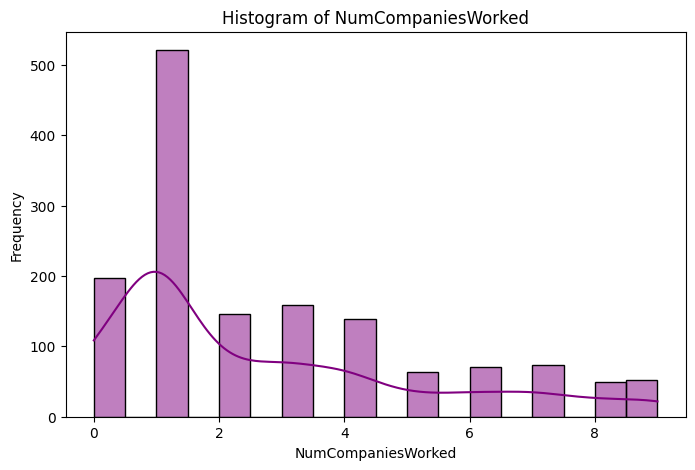

C:\Users\PIYUSH DWIVEDI\AppData\Local\Temp\ipykernel_5140\2389407018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


<Figure size 640x480 with 0 Axes>

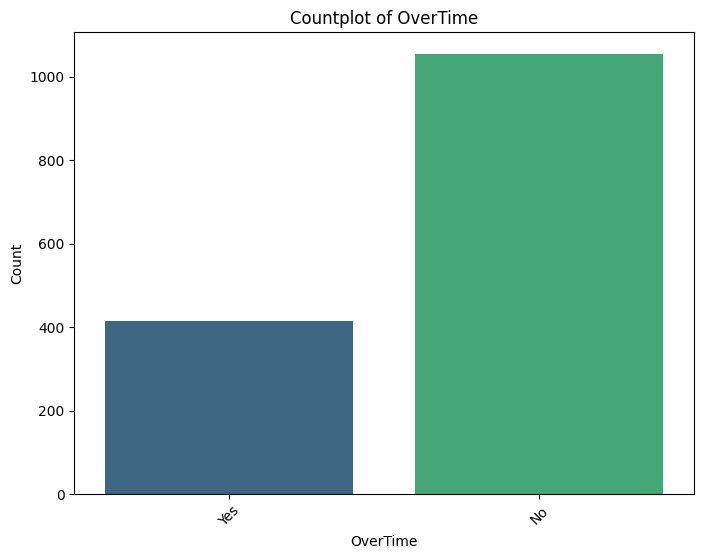

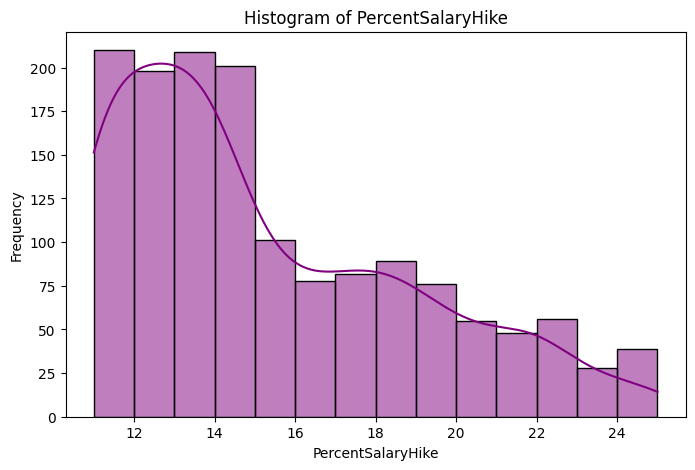

<Figure size 640x480 with 0 Axes>

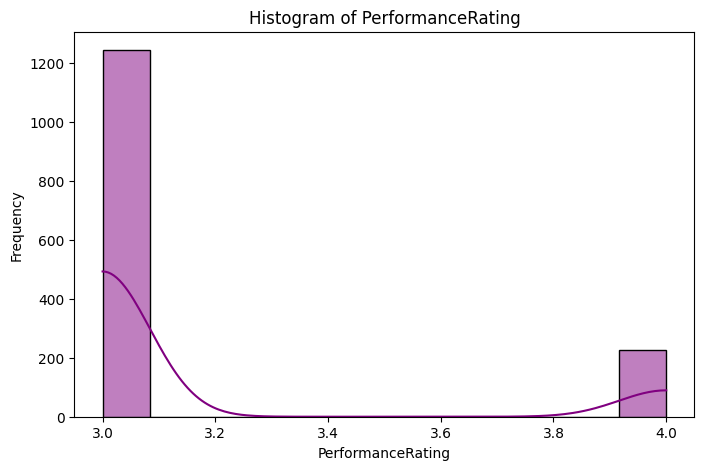

<Figure size 640x480 with 0 Axes>

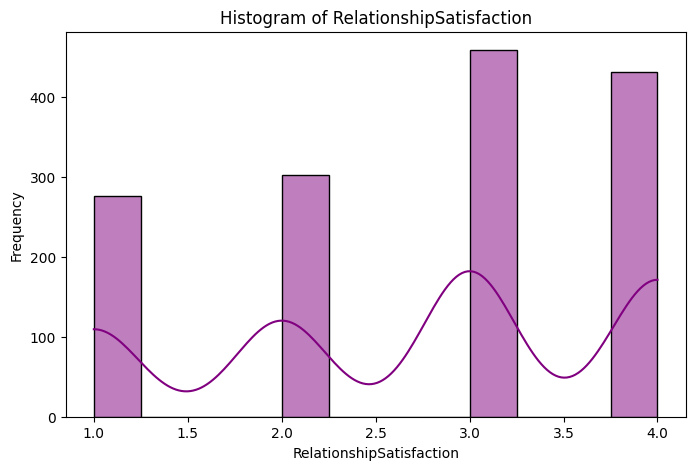

<Figure size 640x480 with 0 Axes>

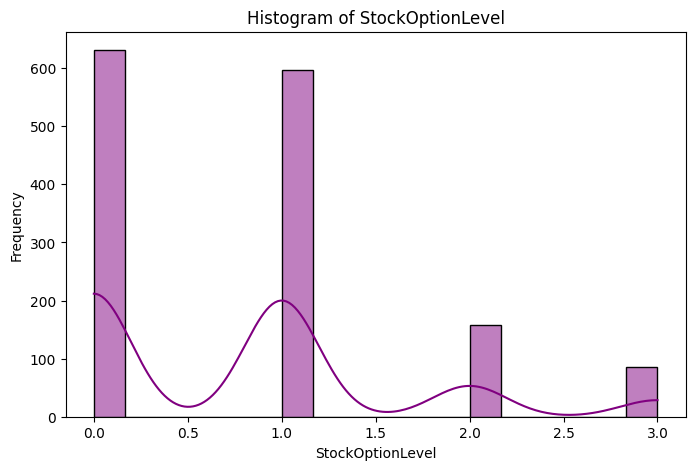

<Figure size 640x480 with 0 Axes>

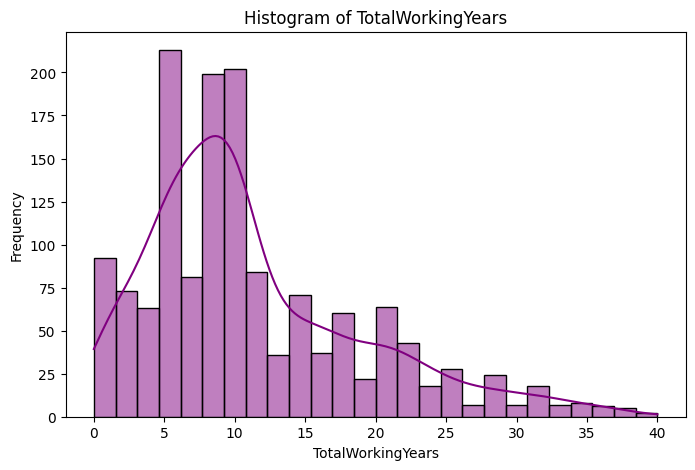

<Figure size 640x480 with 0 Axes>

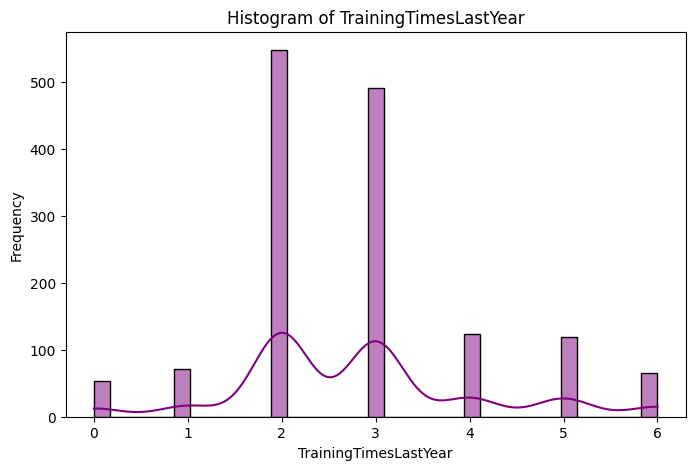

<Figure size 640x480 with 0 Axes>

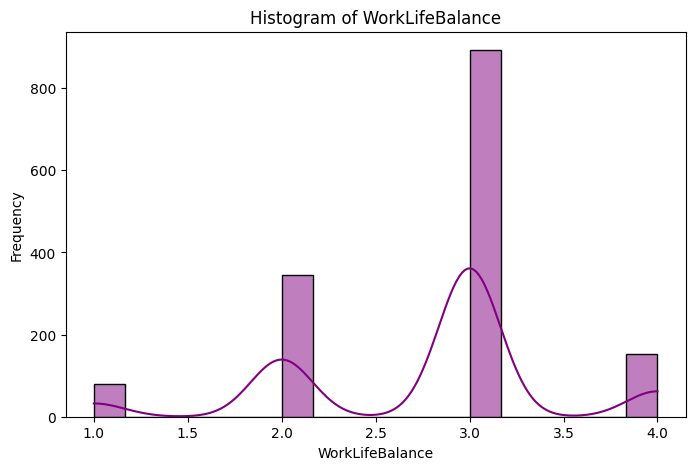

<Figure size 640x480 with 0 Axes>

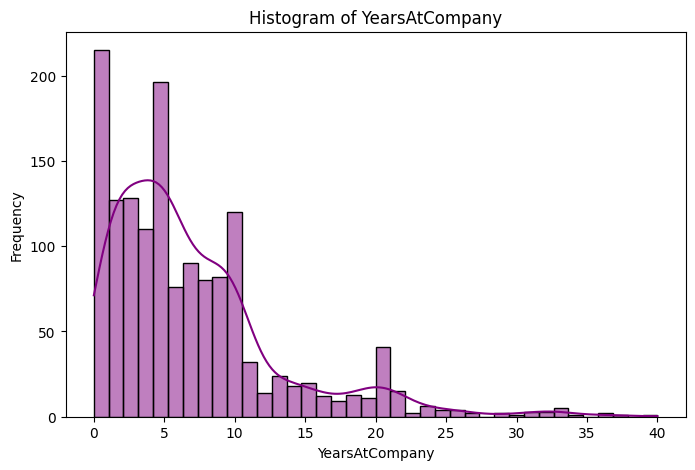

<Figure size 640x480 with 0 Axes>

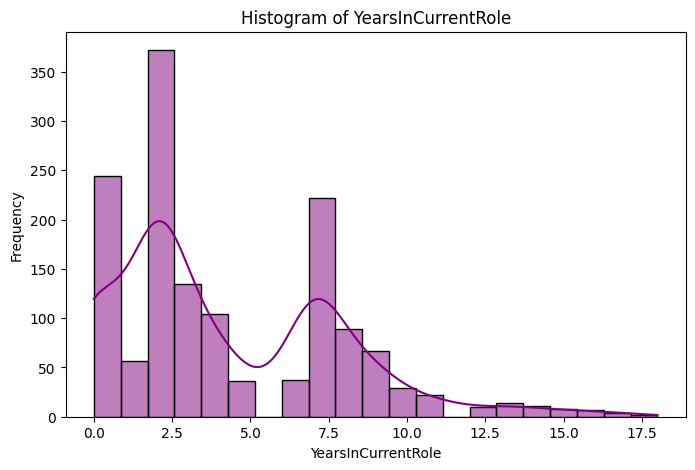

<Figure size 640x480 with 0 Axes>

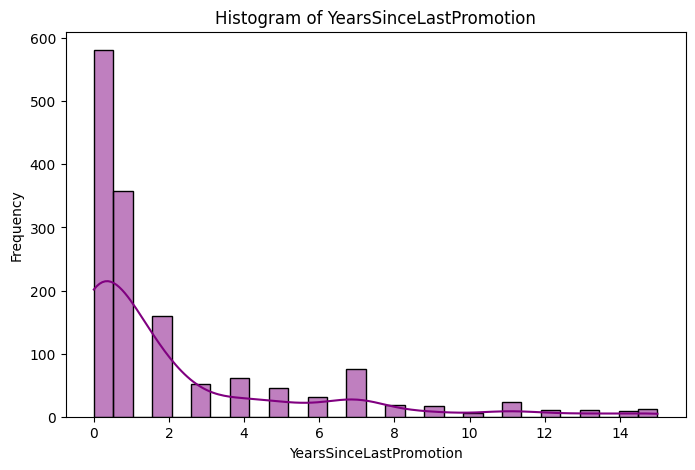

<Figure size 640x480 with 0 Axes>

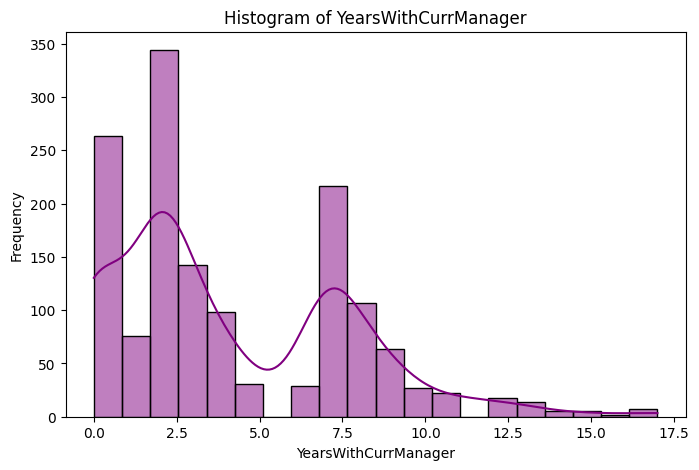

<Figure size 640x480 with 0 Axes>

In [66]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,5))
        sns.histplot(df[column],kde=True,color='Purple')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        plt.tight_layout()
    # For categorical columns, plot a countplot
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

## 4.2 Bivariate Analysis

In [67]:
df1=df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'JobInvolvement',
 'JobLevel']]

In [68]:
df1.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Education,JobInvolvement,JobLevel
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Yes,2,3,2
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,No,1,2,2
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Yes,2,2,1
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Yes,4,3,1
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,No,1,3,1


In [69]:
len(df1['Education'].unique())

5

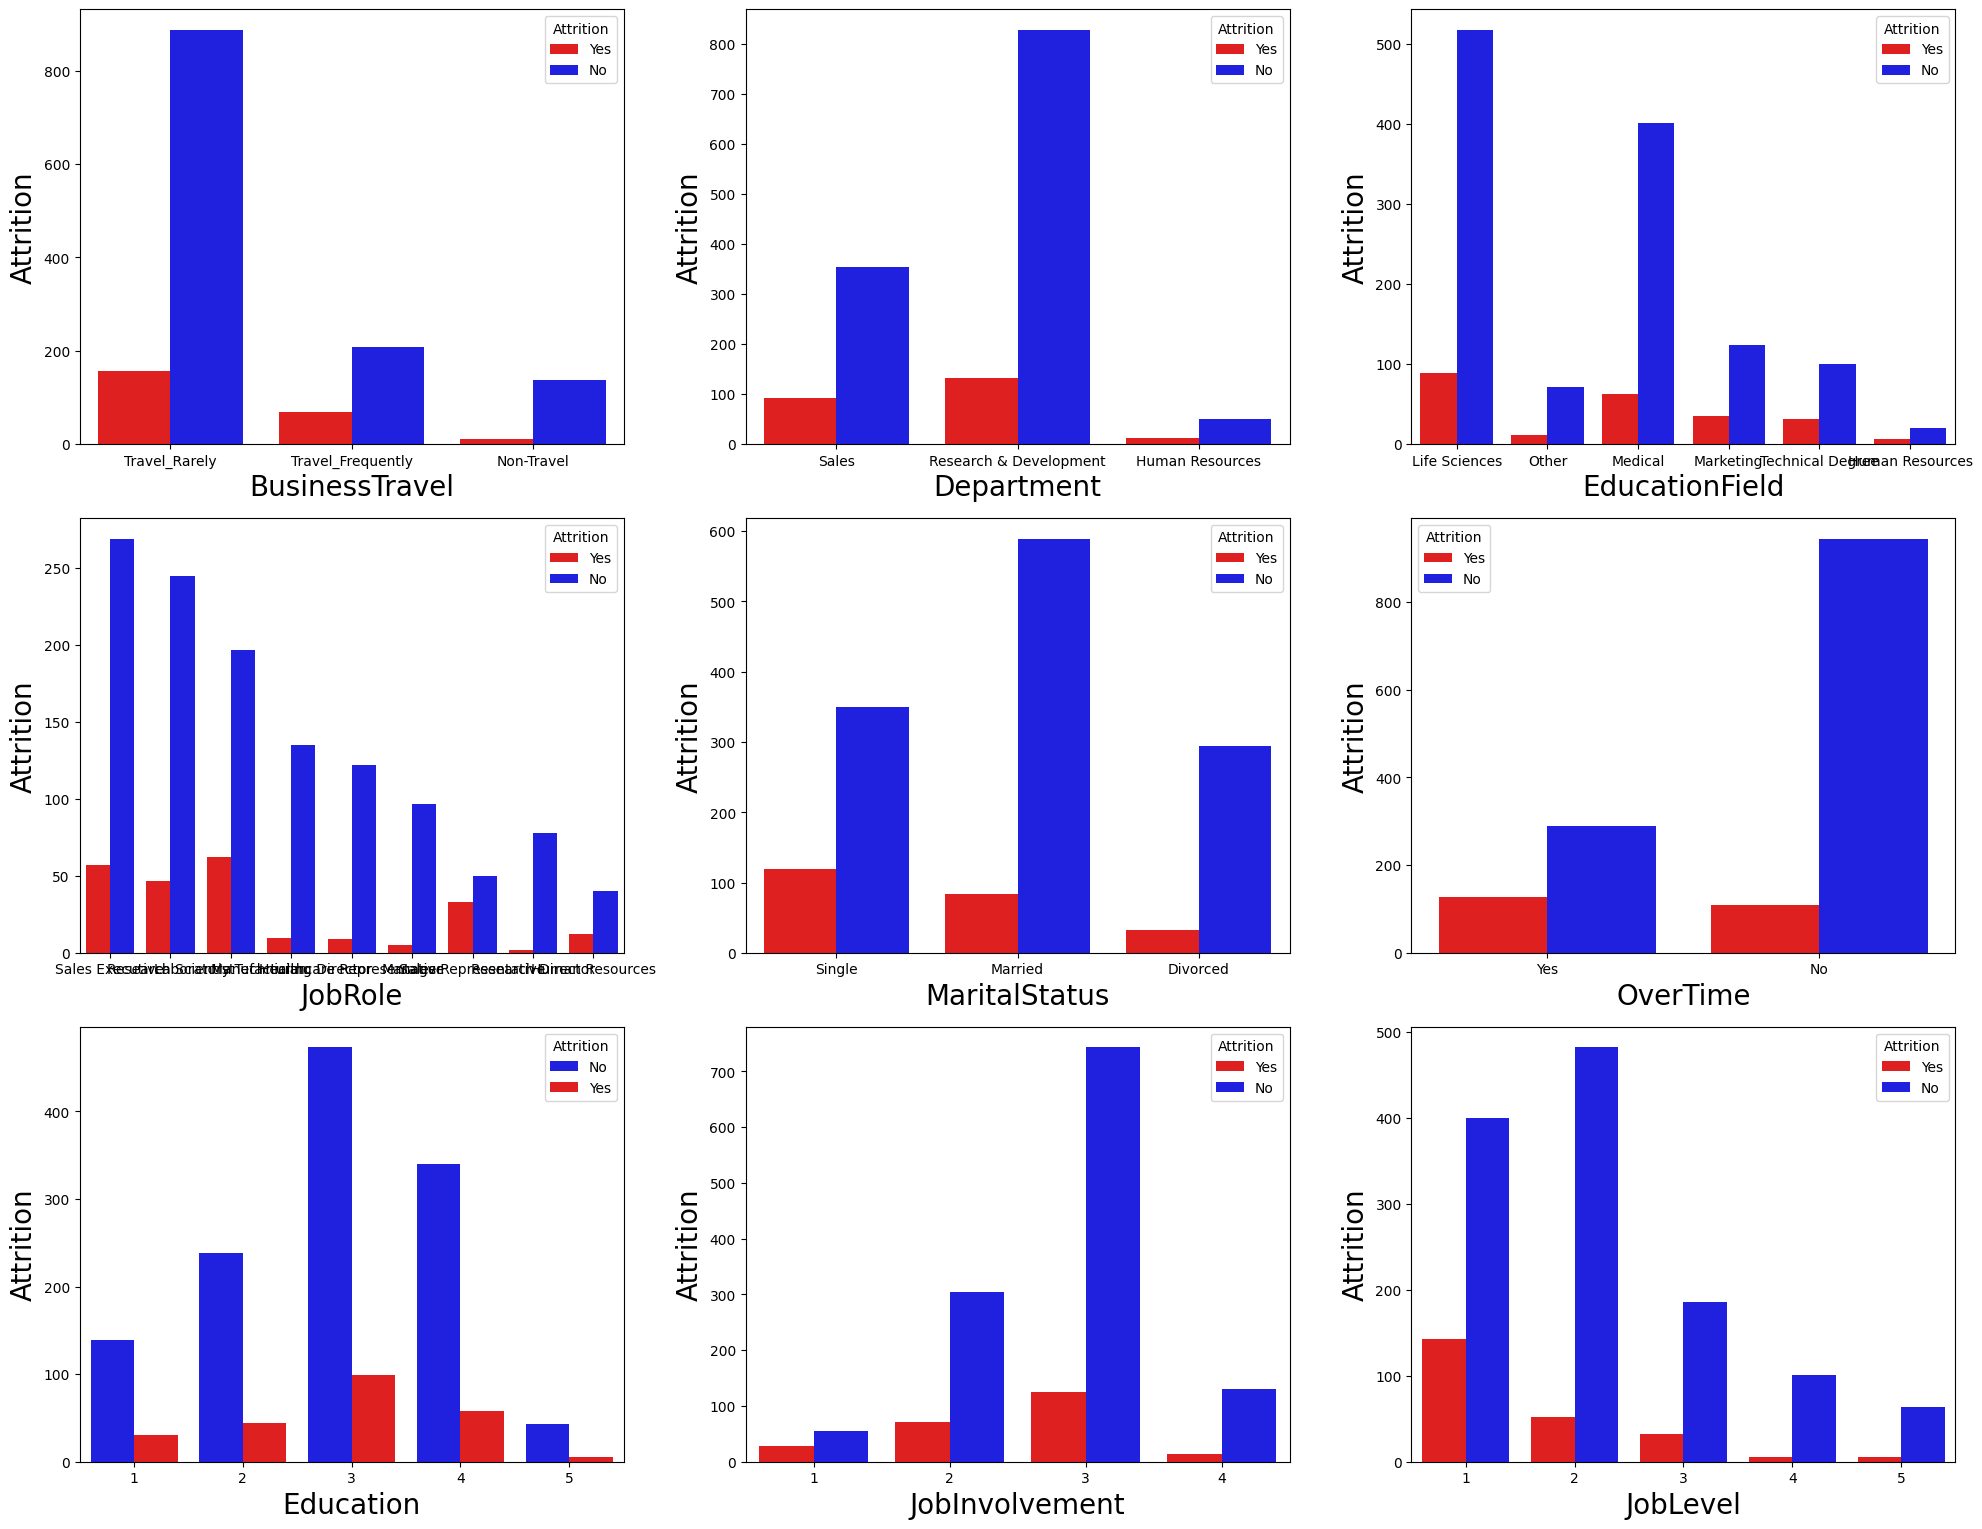

In [70]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in df1:#for loop to acess columns form df1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(5,3,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=df1[column]           #plotting count plot
                        ,hue=df.Attrition,
                        palette={"Yes": "red", "No": "blue"})
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()
plt.show()

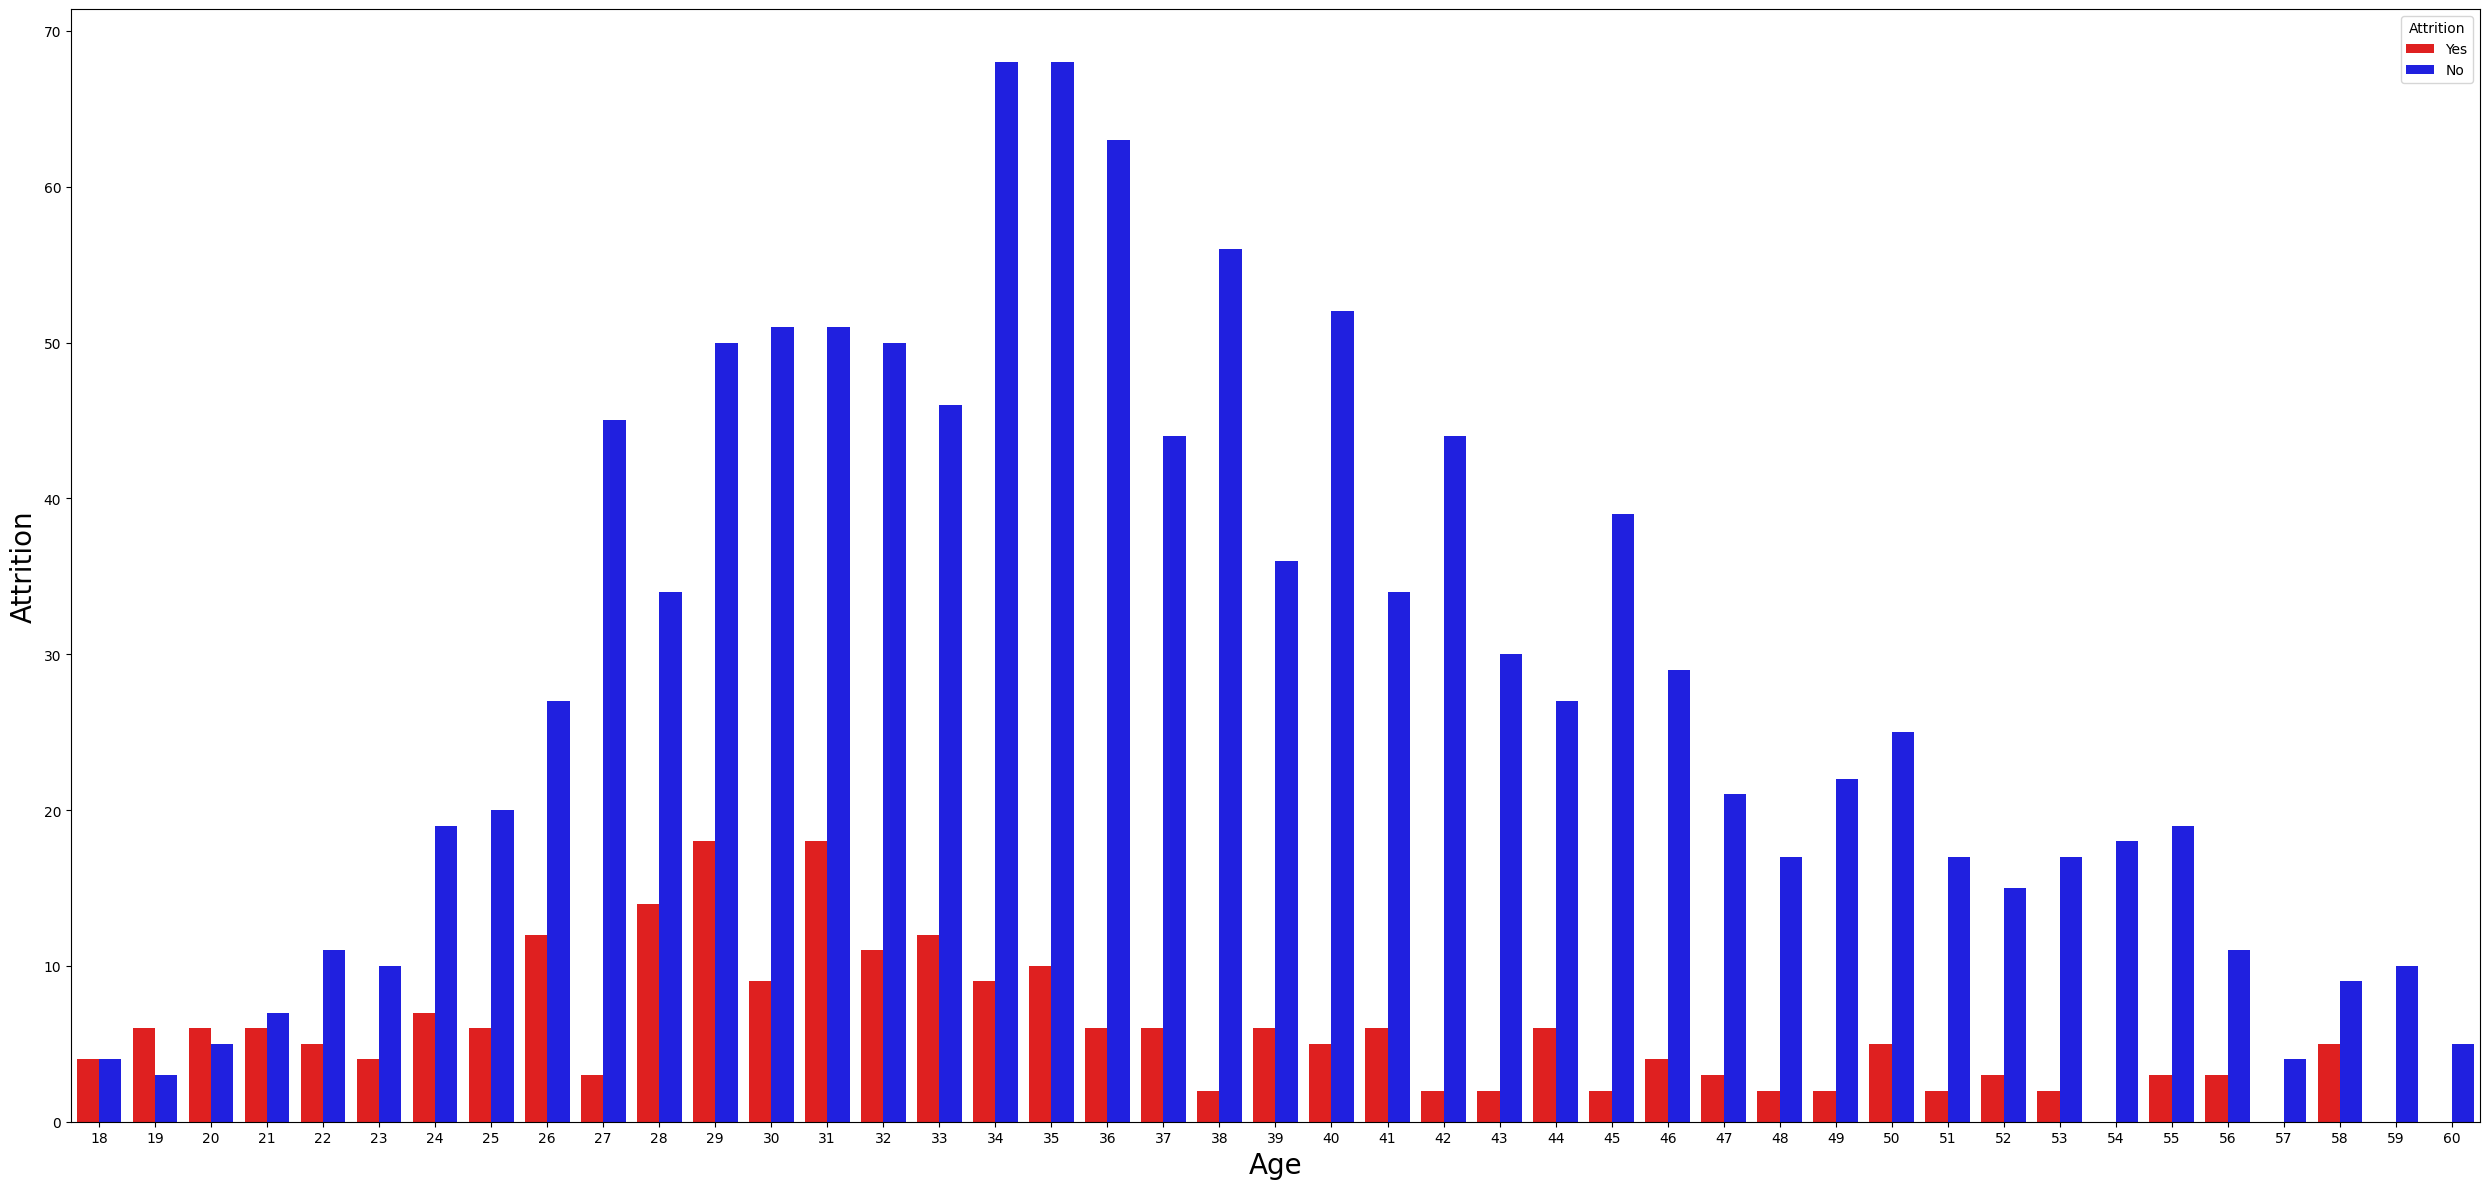

In [81]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df,palette={'Yes': "red", 'No': "blue"})
plt.xlabel('Age',fontsize=20)
plt.ylabel('Attrition',fontsize=20)
plt.tight_layout()
plt.show()

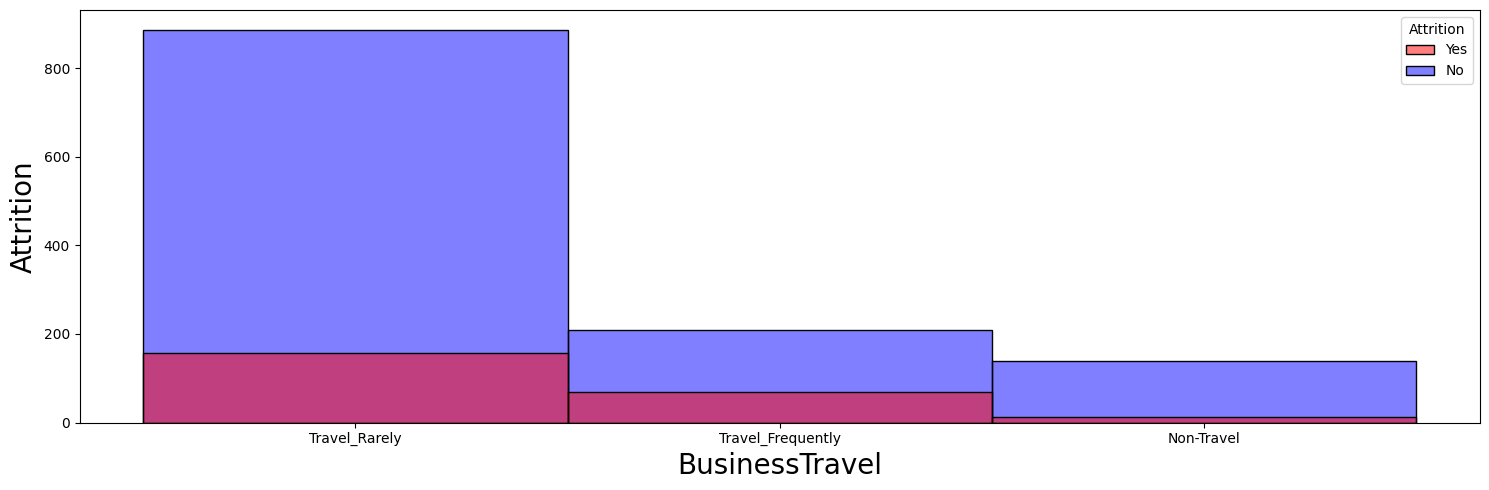

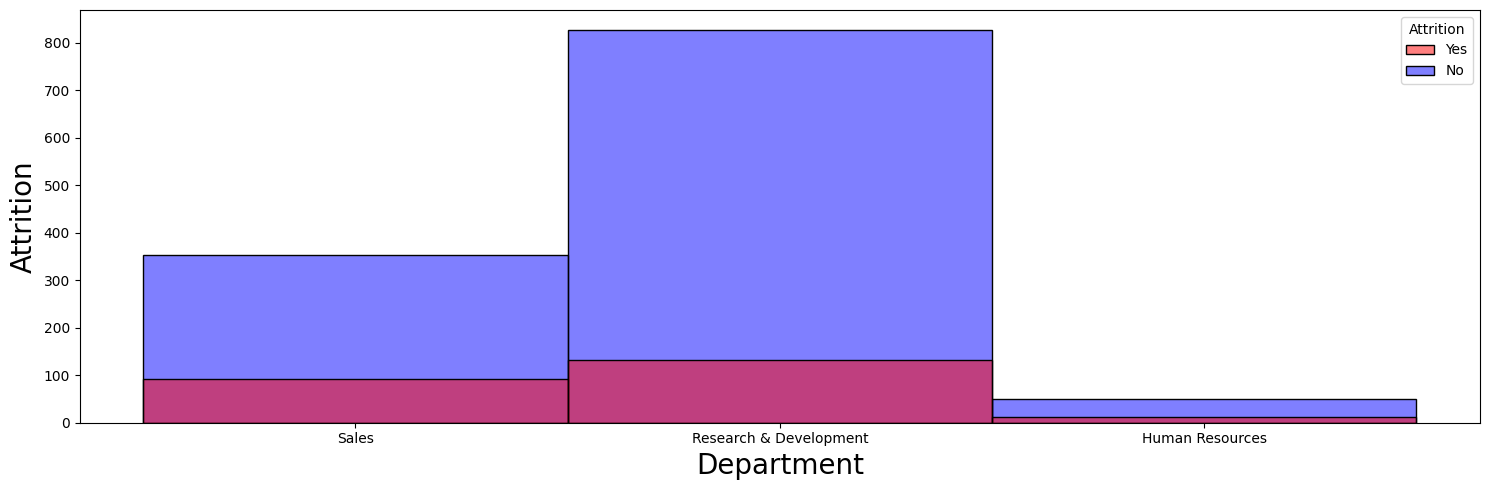

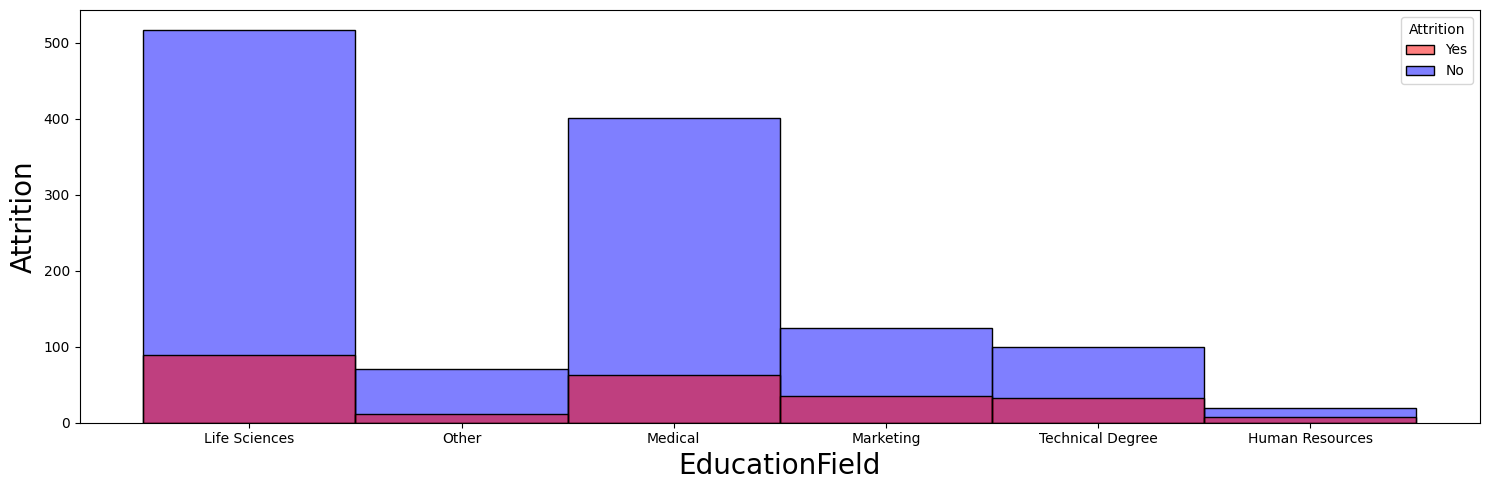

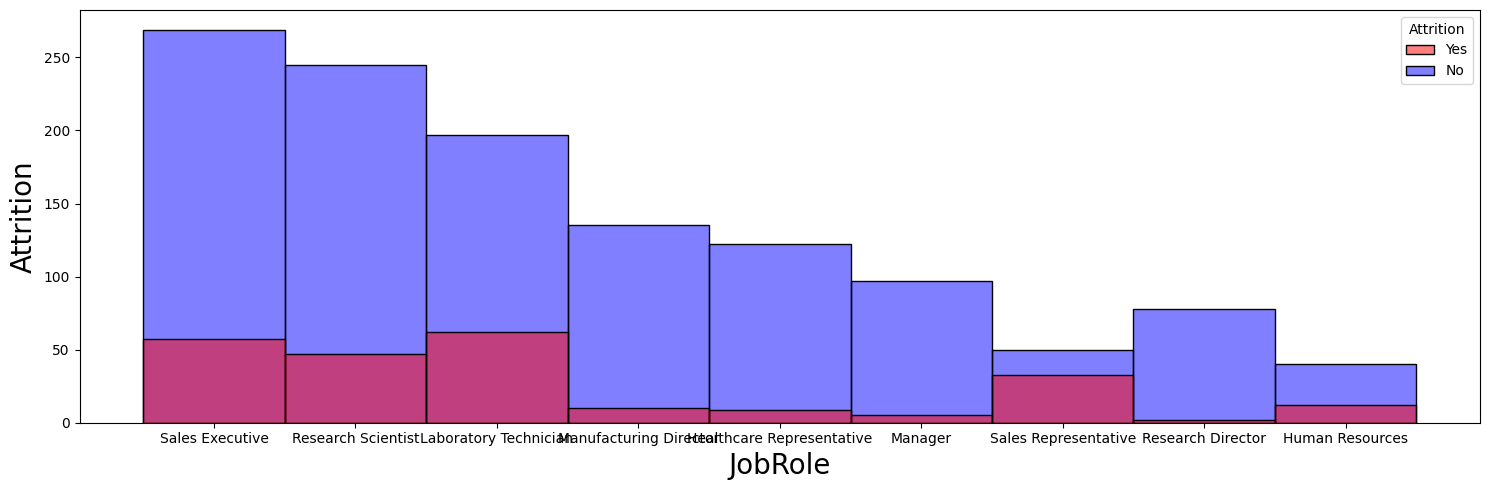

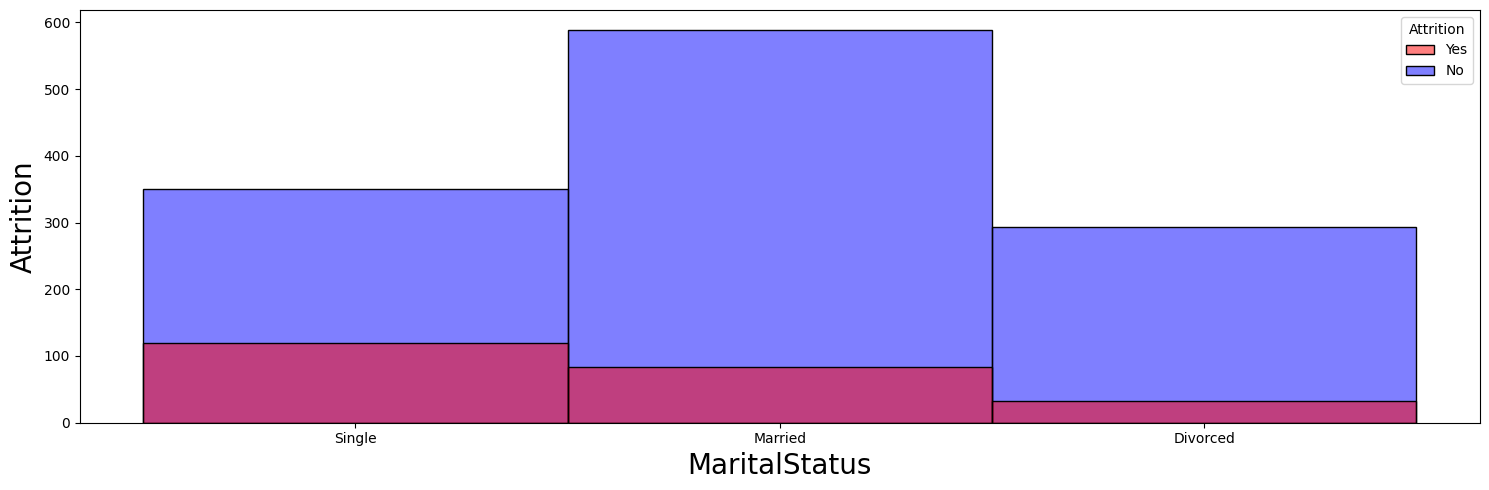

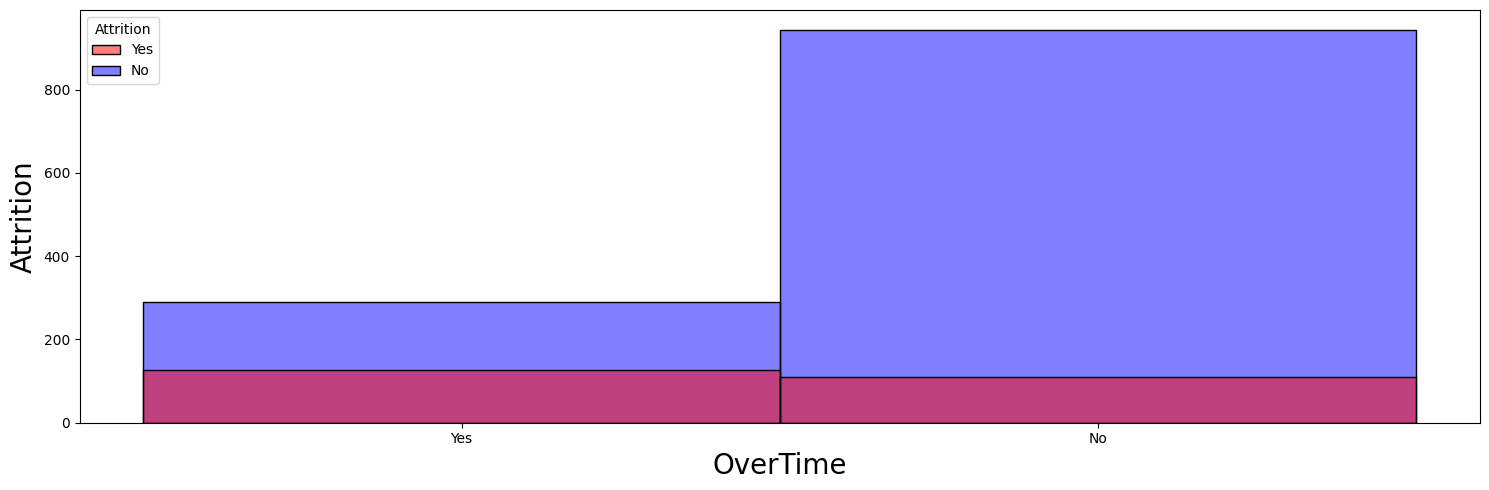

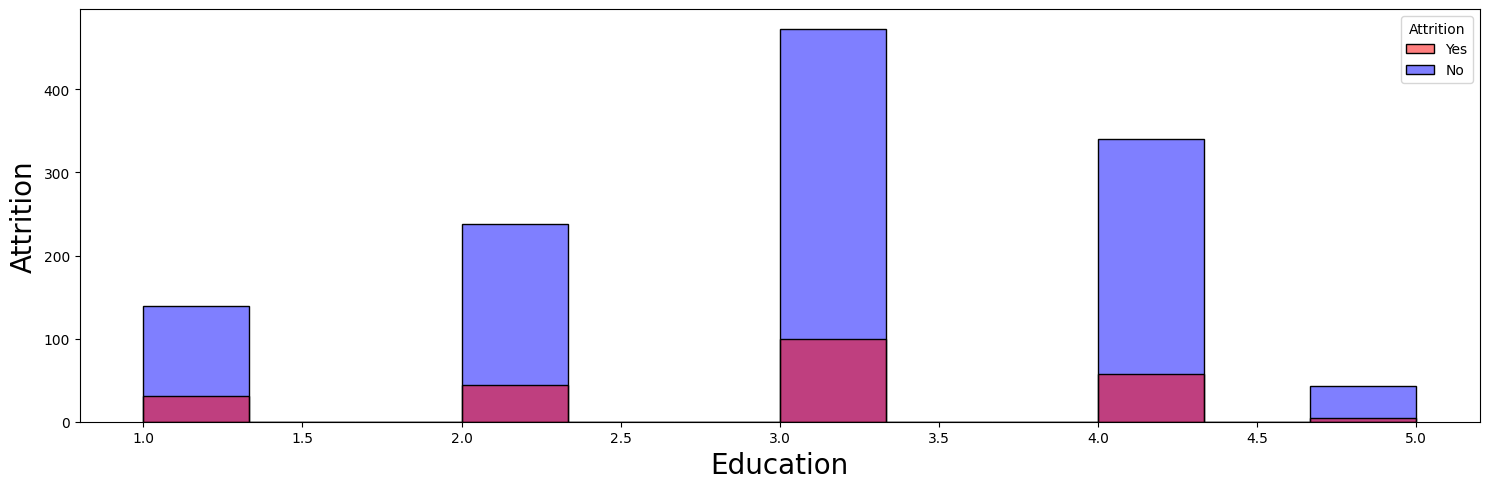

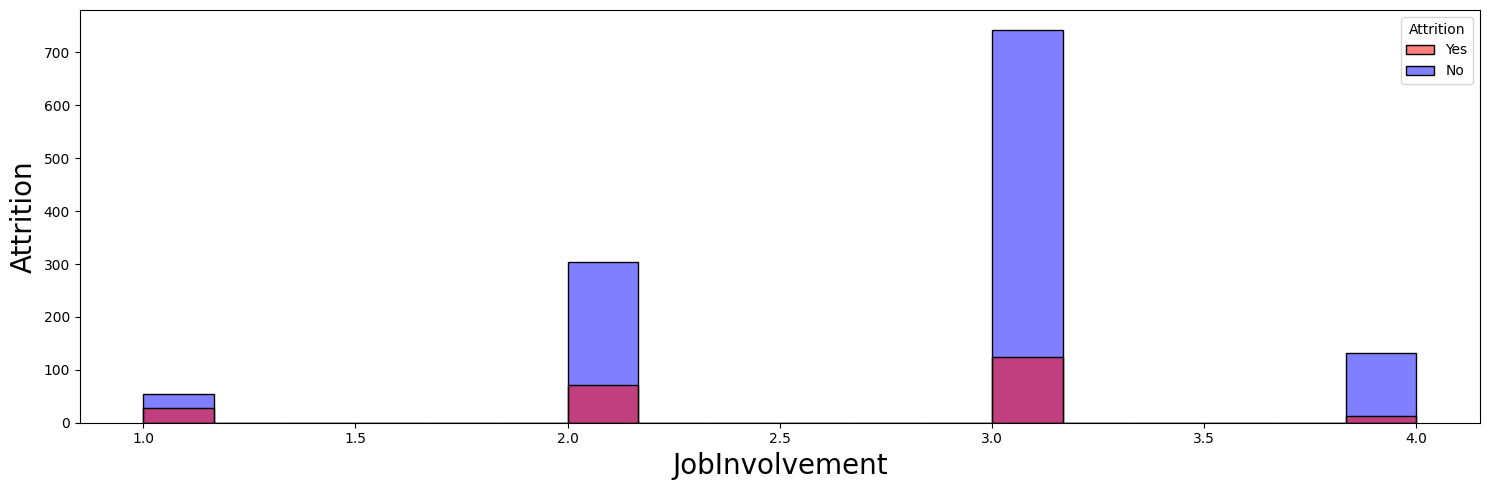

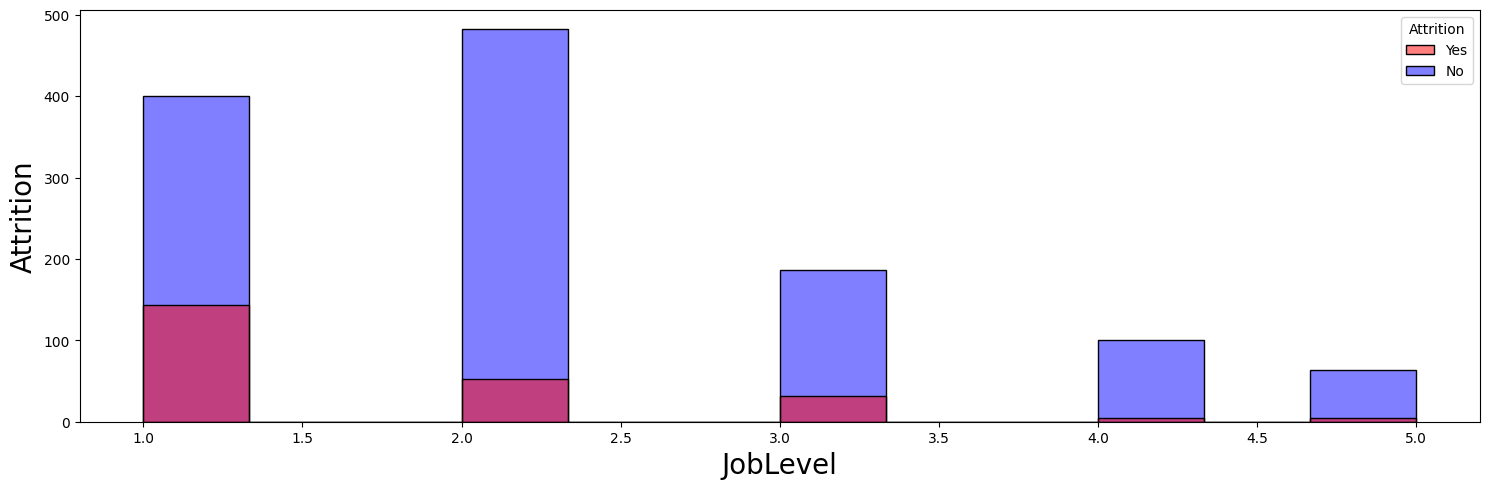

In [78]:
for column in df1:
    plt.figure(figsize=(15,5), facecolor='white')
    sns.histplot(x=df1[column]           #plotting count plot
                    ,hue=df.Attrition,
                    palette={'Yes': "red", 'No': "blue"})
    plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font
    plt.ylabel('Attrition',fontsize=20)
    plt.tight_layout()
    plt.show()

# 5. Data Preprocessing

## 5.1 Data Cleaning

In [19]:
df_final=df.drop(columns=['Over18','EmployeeCount','StandardHours','EmployeeNumber'])

In [20]:
df_final.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<Axes: >

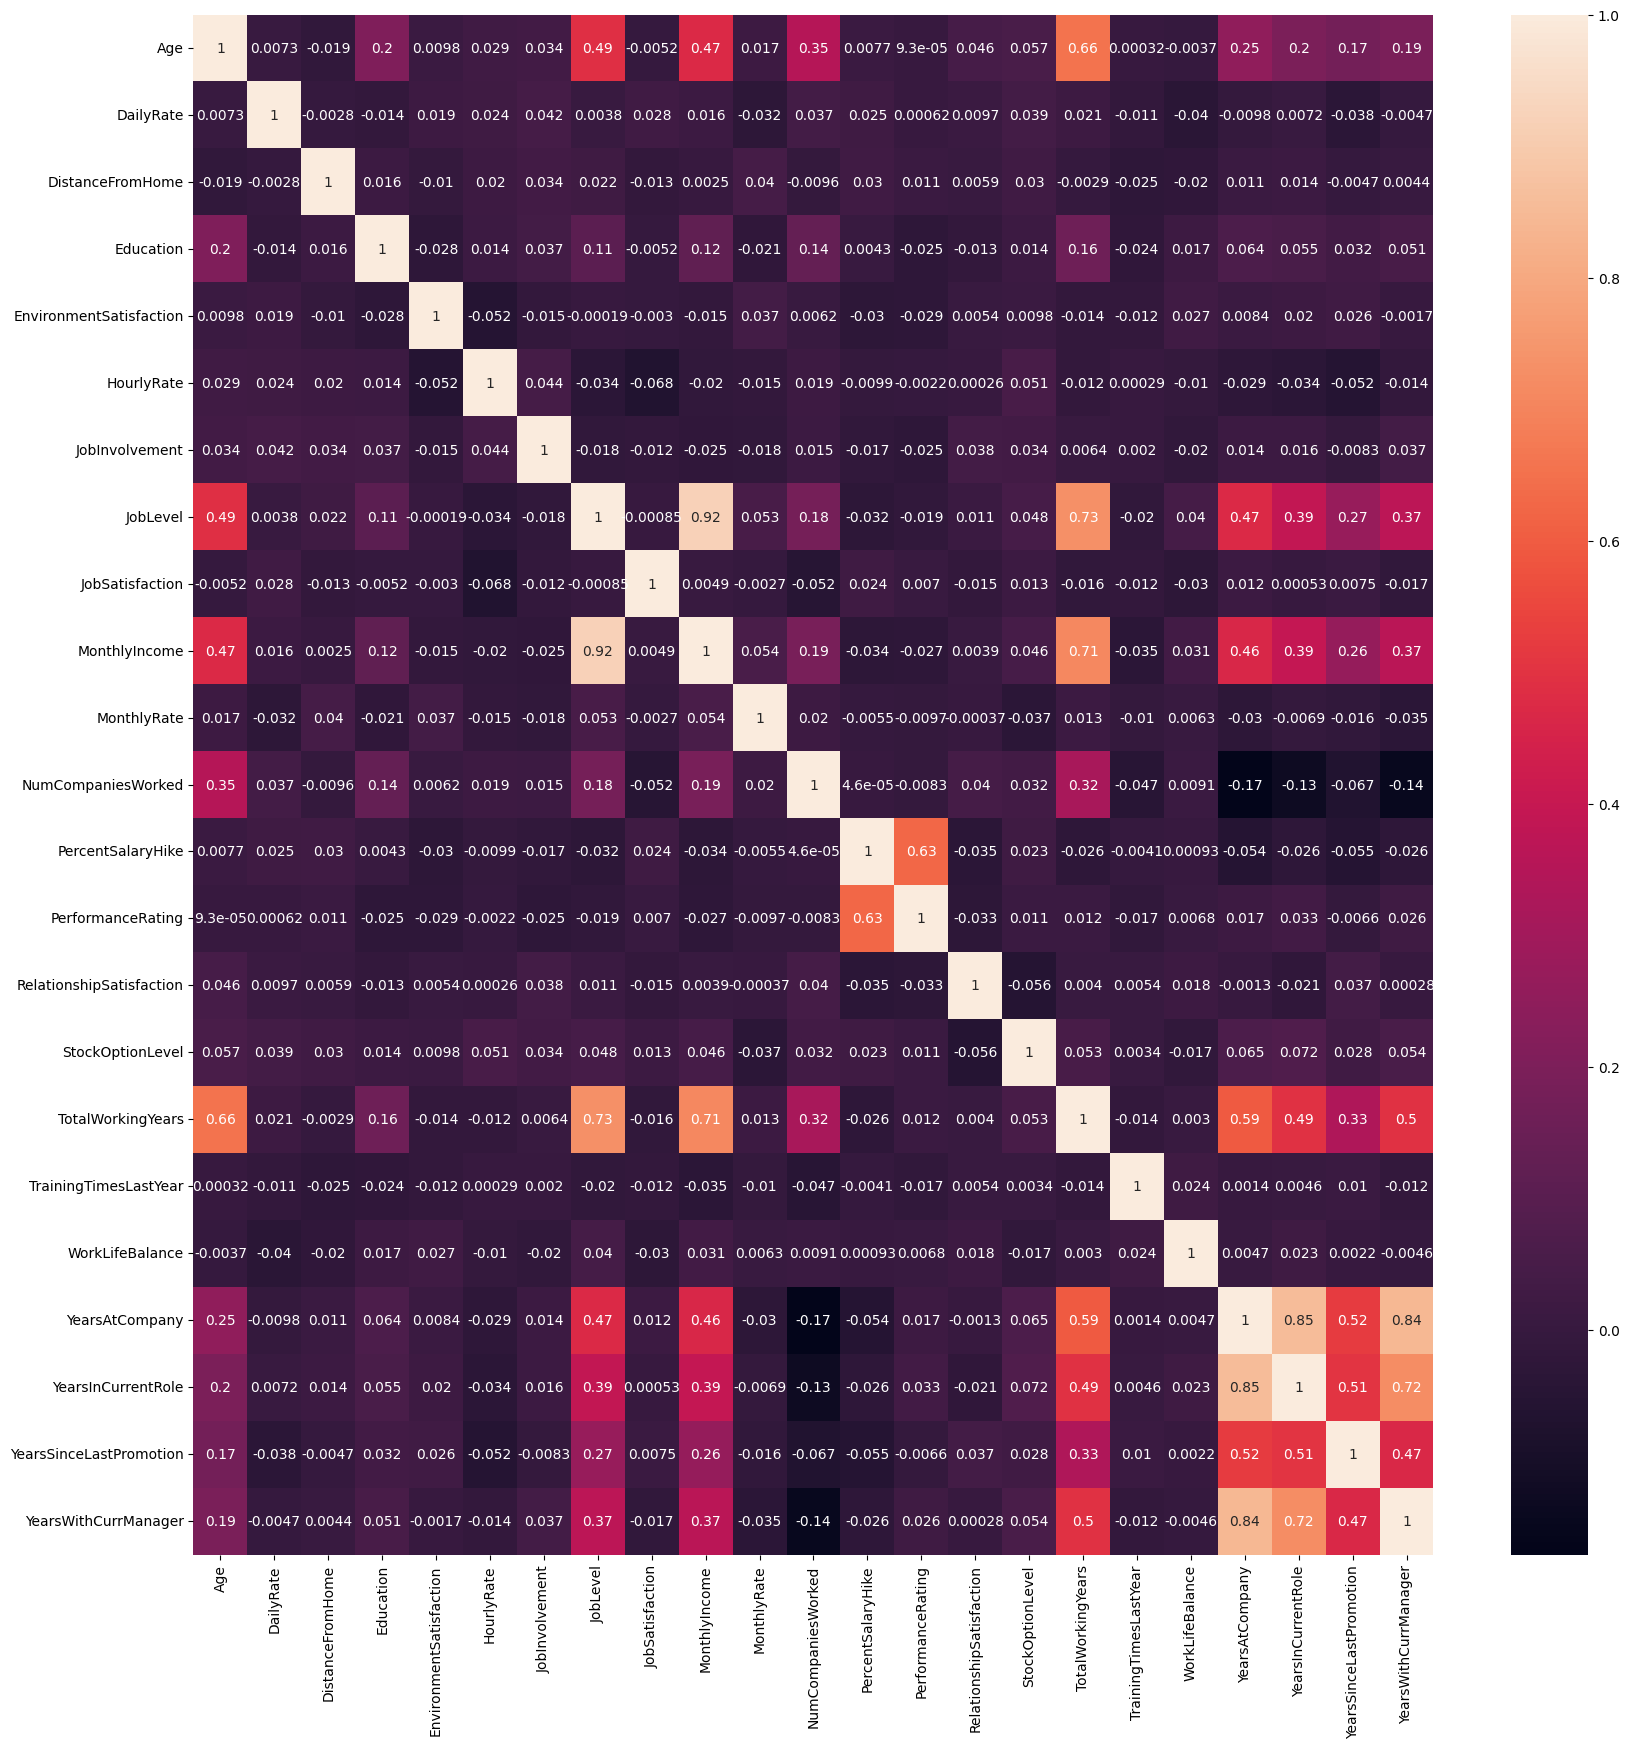

In [21]:
correlations = df_final.corr(numeric_only=True, method='spearman')
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)
# Job level -> Monthly income
# Years at company -> Years in current role
# Years at company -> Years with current manager
# Job level -> Total working years

## 5.2 Data Scaling

## 5.2 Split Data Into x and y

In [22]:
x = df_final.drop('Attrition',axis=1)
y = df_final.Attrition

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
pd.set_option('display.max_columns',None)

In [25]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,3,Male,57,2,1,Laboratory Technician,1,Divorced,2296,10036,0,No,14,3,2,3,2,3,3,1,1,0,0
727,18,Non-Travel,287,Research & Development,5,2,Life Sciences,2,Male,73,3,1,Research Scientist,4,Single,1051,13493,1,No,15,3,4,0,0,2,3,0,0,0,0
254,29,Travel_Rarely,1247,Sales,20,2,Marketing,4,Male,45,3,2,Sales Executive,4,Divorced,6931,10732,2,No,14,3,4,1,10,2,3,3,2,0,2
1175,39,Travel_Rarely,492,Research & Development,12,3,Medical,4,Male,66,3,2,Manufacturing Director,2,Married,5295,7693,4,No,21,4,3,0,7,3,3,5,4,1,0
1341,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,2,Male,89,3,2,Laboratory Technician,3,Divorced,4197,18624,1,No,11,3,1,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,Travel_Rarely,750,Research & Development,28,3,Life Sciences,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,No,17,3,4,2,10,3,2,10,9,6,8
1294,41,Travel_Rarely,447,Research & Development,5,3,Life Sciences,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,No,12,3,1,0,11,3,1,3,2,1,2
860,22,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Yes,11,3,2,1,1,5,3,0,0,0,0
1459,29,Travel_Rarely,1378,Research & Development,13,2,Other,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Yes,13,3,1,1,10,2,3,4,3,0,3


In [26]:
# Encoding the target column "Attrition"
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

In [27]:
y_train

1097    0
727     0
254     0
1175    0
1341    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1176, dtype: int64

In [28]:
encoder = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'OverTime']),  # Ordinal encoding
        ('ohe', OneHotEncoder(drop='first', sparse_output=False), ['Gender', 'MaritalStatus']),  # One-hot encoding with drop_first=True for 'Gender'
    ],
    remainder='passthrough'  # Keep the other columns unchanged
)

# setting to get a pandas df
encoder.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'JobRole', 'OverTime']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender', 'MaritalStatus'])])

In [29]:
pipe = Pipeline([
    ('preprocessing', encoder),  # Assuming `encoder` is your previously defined encoder
    ('scaling', MinMaxScaler()),  # Scaling step
])

# Fit the pipeline on the training data
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'OverTime']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'MaritalStatus'])])),
                ('scaling', MinMaxScaler())])

In [30]:
x_train_transformed = pd.DataFrame(pipe.transform(x_train))
x_test_transformed = pd.DataFrame(pipe.transform(x_test))

In [31]:
x_train_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1.0,0.5,1.0,0.250,0.0,1.0,0.0,0.0,0.142857,0.177905,0.714286,0.25,0.666667,0.385714,0.333333,0.00,0.000000,0.067773,0.318892,0.000000,0.214286,0.0,0.333333,1.000000,0.050,0.500000,0.666667,0.025,0.055556,0.000000,0.000000
1,0.0,0.5,0.2,0.750,0.0,1.0,0.0,1.0,0.000000,0.132712,0.142857,0.25,0.333333,0.614286,0.666667,0.00,1.000000,0.002212,0.457699,0.111111,0.285714,0.0,1.000000,0.000000,0.000,0.333333,0.666667,0.000,0.000000,0.000000,0.000000
2,1.0,1.0,0.4,0.875,0.0,1.0,0.0,0.0,0.261905,0.821377,0.678571,0.25,1.000000,0.214286,0.666667,0.25,1.000000,0.311848,0.346838,0.222222,0.214286,0.0,1.000000,0.333333,0.250,0.333333,0.666667,0.075,0.111111,0.000000,0.117647
3,1.0,0.5,0.6,0.500,0.0,1.0,1.0,0.0,0.500000,0.279770,0.392857,0.50,1.000000,0.514286,0.666667,0.25,0.333333,0.225698,0.224814,0.444444,0.714286,1.0,0.666667,0.000000,0.175,0.500000,0.666667,0.125,0.222222,0.066667,0.000000
4,1.0,0.5,0.2,0.250,0.0,1.0,0.0,0.0,0.309524,0.149928,0.678571,0.50,0.333333,0.842857,0.666667,0.25,0.666667,0.167878,0.663722,0.111111,0.000000,0.0,0.000000,0.333333,0.250,0.333333,0.666667,0.250,0.444444,0.000000,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1.0,0.5,0.2,0.250,0.0,1.0,1.0,0.0,0.404762,0.464849,0.964286,0.50,0.333333,0.228571,1.000000,0.25,0.666667,0.126277,0.933708,0.111111,0.428571,0.0,1.000000,0.666667,0.250,0.500000,0.333333,0.250,0.500000,0.400000,0.470588
1172,1.0,0.5,0.2,0.000,0.0,1.0,0.0,1.0,0.547619,0.247489,0.142857,0.50,0.333333,0.785714,1.000000,0.25,0.333333,0.308636,0.539490,0.333333,0.071429,0.0,0.000000,0.000000,0.275,0.500000,0.000000,0.075,0.111111,0.066667,0.117647
1173,0.5,0.5,0.2,0.750,1.0,1.0,1.0,0.0,0.095238,0.827834,0.071429,0.75,0.666667,0.257143,0.333333,0.00,1.000000,0.097104,0.085485,0.000000,0.000000,0.0,0.333333,0.333333,0.025,0.833333,0.666667,0.000,0.000000,0.000000,0.000000
1174,1.0,0.5,0.8,0.250,1.0,1.0,1.0,0.0,0.261905,0.915352,0.428571,0.25,1.000000,0.228571,0.333333,0.25,0.333333,0.158820,0.866693,0.444444,0.142857,0.0,0.000000,0.333333,0.250,0.333333,0.666667,0.100,0.166667,0.000000,0.176471


In [32]:
sm = SMOTE()
x_smote, y_smote = sm.fit_resample(x_train_transformed, y_train)

In [33]:
y_smote.value_counts()

Attrition
0    978
1    978
Name: count, dtype: int64

# 6. Model Building

## 6.1 DecisionTreeClassifier

Accuracy score of LogisticRegression() is: 0.7840136054421769 and 0.7585034013605442
F1 score of LogisticRegression() is: 0.40336134453781514
Precision score of LogisticRegression() is: 0.3
Recall score of LogisticRegression() is: 0.6153846153846154


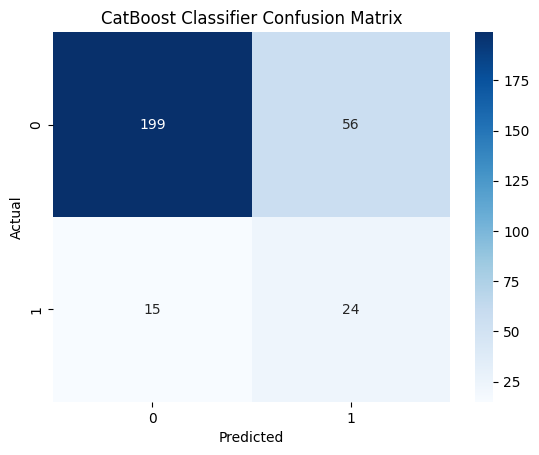

Classification report of LogisticRegression() is:               precision    recall  f1-score   support

           0       0.93      0.78      0.85       255
           1       0.30      0.62      0.40        39

    accuracy                           0.76       294
   macro avg       0.61      0.70      0.63       294
weighted avg       0.85      0.76      0.79       294

****************************************************************************
Accuracy score of SVC() is: 0.9090136054421769 and 0.8231292517006803
F1 score of SVC() is: 0.4222222222222222
Precision score of SVC() is: 0.37254901960784315
Recall score of SVC() is: 0.48717948717948717


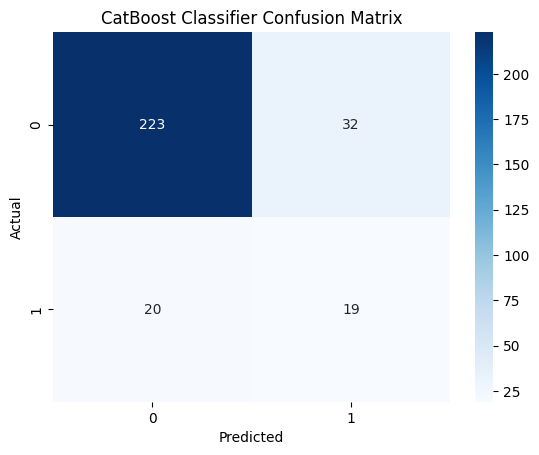

Classification report of SVC() is:               precision    recall  f1-score   support

           0       0.92      0.87      0.90       255
           1       0.37      0.49      0.42        39

    accuracy                           0.82       294
   macro avg       0.65      0.68      0.66       294
weighted avg       0.85      0.82      0.83       294

****************************************************************************
Accuracy score of RandomForestClassifier() is: 1.0 and 0.8605442176870748
F1 score of RandomForestClassifier() is: 0.16326530612244897
Precision score of RandomForestClassifier() is: 0.4
Recall score of RandomForestClassifier() is: 0.10256410256410256


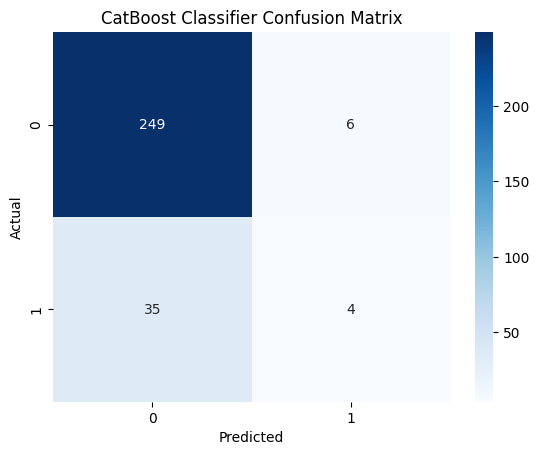

Classification report of RandomForestClassifier() is:               precision    recall  f1-score   support

           0       0.88      0.98      0.92       255
           1       0.40      0.10      0.16        39

    accuracy                           0.86       294
   macro avg       0.64      0.54      0.54       294
weighted avg       0.81      0.86      0.82       294

****************************************************************************
Accuracy score of DecisionTreeClassifier() is: 1.0 and 0.7857142857142857
F1 score of DecisionTreeClassifier() is: 0.20253164556962025
Precision score of DecisionTreeClassifier() is: 0.2
Recall score of DecisionTreeClassifier() is: 0.20512820512820512


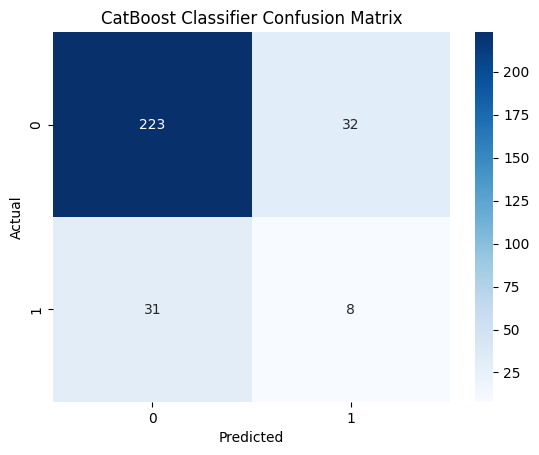

Classification report of DecisionTreeClassifier() is:               precision    recall  f1-score   support

           0       0.88      0.87      0.88       255
           1       0.20      0.21      0.20        39

    accuracy                           0.79       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.79      0.79       294

****************************************************************************
Accuracy score of KNeighborsClassifier() is: 0.8078231292517006 and 0.6360544217687075
F1 score of KNeighborsClassifier() is: 0.28187919463087246
Precision score of KNeighborsClassifier() is: 0.19090909090909092
Recall score of KNeighborsClassifier() is: 0.5384615384615384


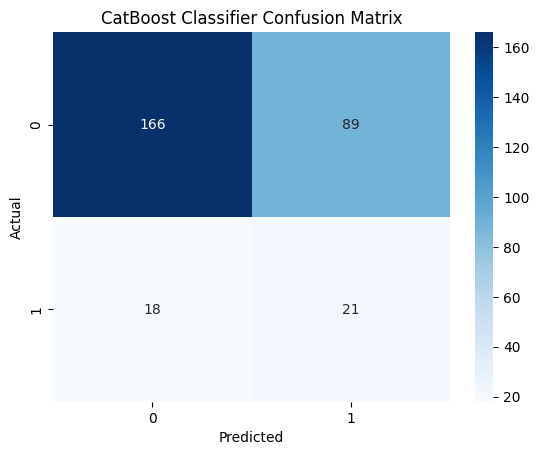

Classification report of KNeighborsClassifier() is:               precision    recall  f1-score   support

           0       0.90      0.65      0.76       255
           1       0.19      0.54      0.28        39

    accuracy                           0.64       294
   macro avg       0.55      0.59      0.52       294
weighted avg       0.81      0.64      0.69       294

****************************************************************************
Accuracy score of GaussianNB() is: 0.6198979591836735 and 0.6190476190476191
F1 score of GaussianNB() is: 0.3253012048192771
Precision score of GaussianNB() is: 0.2125984251968504
Recall score of GaussianNB() is: 0.6923076923076923


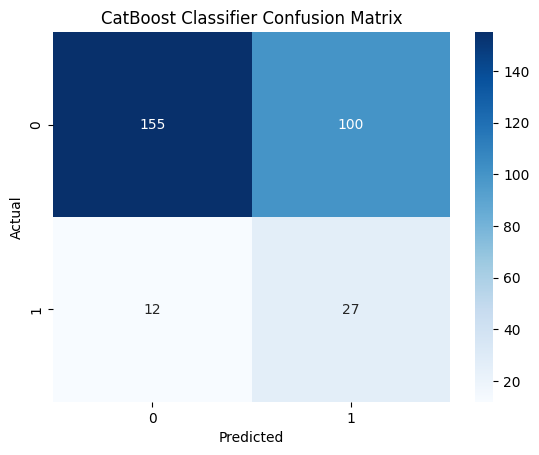

Classification report of GaussianNB() is:               precision    recall  f1-score   support

           0       0.93      0.61      0.73       255
           1       0.21      0.69      0.33        39

    accuracy                           0.62       294
   macro avg       0.57      0.65      0.53       294
weighted avg       0.83      0.62      0.68       294

****************************************************************************
Accuracy score of GradientBoostingClassifier() is: 0.9481292517006803 and 0.8809523809523809
F1 score of GradientBoostingClassifier() is: 0.4262295081967213
Precision score of GradientBoostingClassifier() is: 0.5909090909090909
Recall score of GradientBoostingClassifier() is: 0.3333333333333333


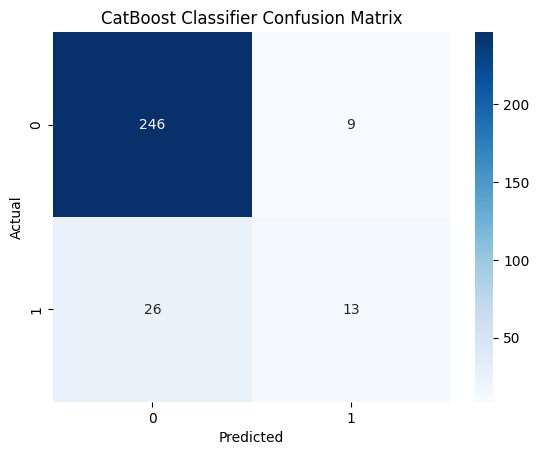

Classification report of GradientBoostingClassifier() is:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.59      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.86      0.88      0.87       294

****************************************************************************


c:\CODDING\data_science\Predicting_Employee_Attrition\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score of AdaBoostClassifier() is: 0.8826530612244898 and 0.8503401360544217
F1 score of AdaBoostClassifier() is: 0.47619047619047616
Precision score of AdaBoostClassifier() is: 0.4444444444444444
Recall score of AdaBoostClassifier() is: 0.5128205128205128


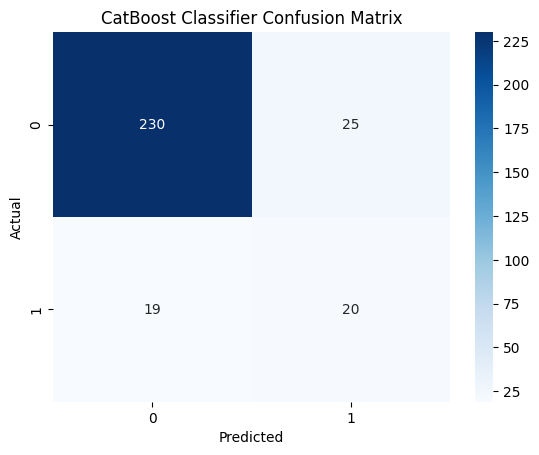

Classification report of AdaBoostClassifier() is:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       255
           1       0.44      0.51      0.48        39

    accuracy                           0.85       294
   macro avg       0.68      0.71      0.69       294
weighted avg       0.86      0.85      0.85       294

****************************************************************************


In [34]:
models=[LogisticRegression(),SVC(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier()]
train_acc=[]
test_acc=[]
recall_scores=[]



# Loop through the models
for model in models:
    model.fit(x_smote,y_smote)
    # prediction with x_test
    y_pred=model.predict(x_test_transformed)
    #prediction with x_train
    y_train_predict=model.predict(x_train_transformed)

    train_accuracy=accuracy_score(y_train,y_train_predict)
    train_acc.append(train_accuracy)
    test_accuracy=accuracy_score(y_test,y_pred)
    test_acc.append(test_accuracy)
    recall=recall_score(y_test,y_pred)
    recall_scores.append(recall)
    
    print(f"Accuracy score of {model} is: {train_accuracy} and {test_accuracy}")
    print(f"F1 score of {model} is: {f1_score(y_test,y_pred)}")
    print(f"Precision score of {model} is: {precision_score(y_test,y_pred)}")
    print(f"Recall score of {model} is: {recall_score(y_test,y_pred)}")
    cb_cnf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cb_cnf, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('CatBoost Classifier Confusion Matrix')
    plt.show()
    print(f"Classification report of {model} is: {classification_report(y_test,y_pred)}")
    print("*"*76)

## 6.2 Model Seclection

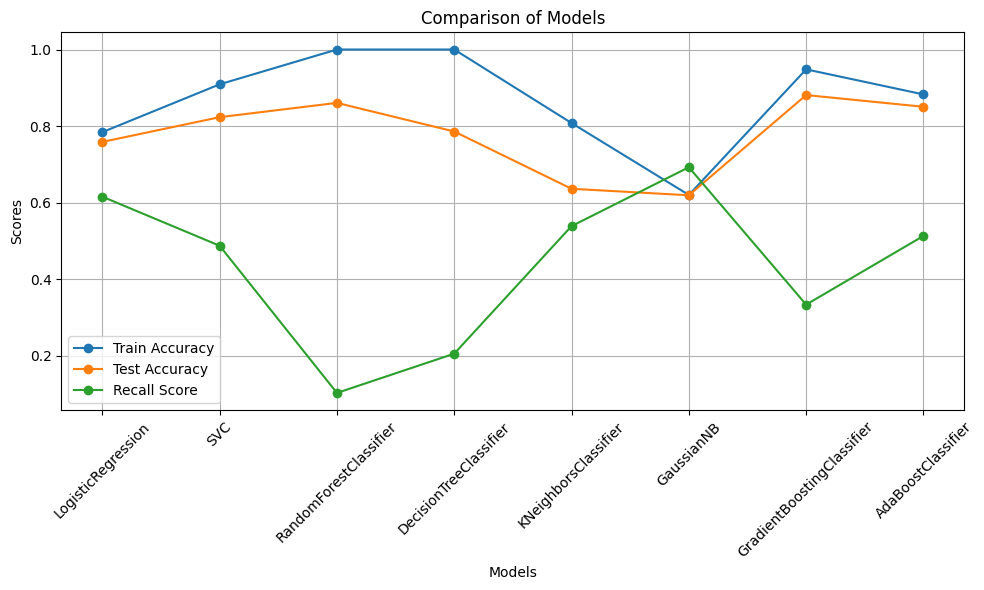

In [35]:
mods=['LogisticRegression','SVC','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','GradientBoostingClassifier','AdaBoostClassifier']


plt.figure(figsize=(10, 6))

# Train accuracy
plt.plot(mods, train_acc, marker='o', label='Train Accuracy')

# Test accuracy
plt.plot(mods, test_acc, marker='o', label='Test Accuracy')

# Recall score
plt.plot(mods, recall_scores, marker='o', label='Recall Score')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Models')
plt.legend()

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Hyper-parameter tuning

In [36]:
from sklearn.model_selection import GridSearchCV
grid_search_params = {
    'penalty': ['l1', 'l2'],                    # Regularization penalty (l1: Lasso, l2: Ridge)
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],            # Algorithm to use in optimization problem
    'max_iter': [100, 200, 300],                 # Maximum number of iterations for optimization
    'class_weight': [None, 'balanced'],          # Weights associated with classes to address class imbalance
    'tol': [1e-4, 1e-3, 1e-2],                   # Tolerance for stopping criteria
    'fit_intercept': [True, False]               # Whether to fit the intercept for the model
}



In [37]:
lo_clf = LogisticRegression(random_state=3)
lo_cv = GridSearchCV(lo_clf, grid_search_params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lo_cv.fit(x_smote,y_smote)
best_params = lo_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best paramters: {'C': 100, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01})


In [38]:
lo_cv.best_score_

0.7950023487655933

Accuracy score of LogisticRegression(C=10, solver='saga') is: 0.7797619047619048 and 0.7448979591836735
F1 score of LogisticRegression(C=10, solver='saga') is: 0.3902439024390244
Precision score of LogisticRegression(C=10, solver='saga') is: 0.2857142857142857
Recall score of LogisticRegression(C=10, solver='saga') is: 0.6153846153846154


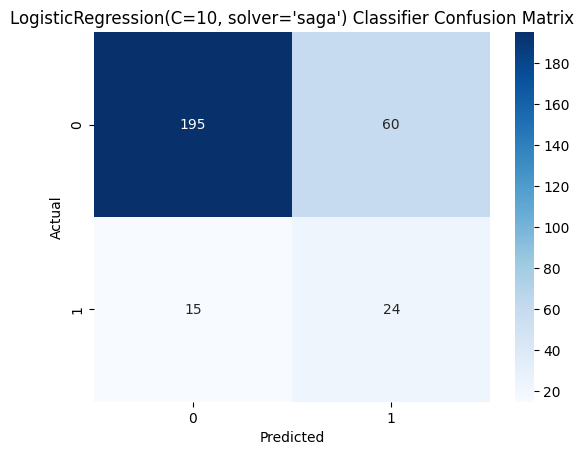

Classification report of LogisticRegression(C=10, solver='saga') is:               precision    recall  f1-score   support

           0       0.93      0.76      0.84       255
           1       0.29      0.62      0.39        39

    accuracy                           0.74       294
   macro avg       0.61      0.69      0.61       294
weighted avg       0.84      0.74      0.78       294

****************************************************************************


In [39]:
model=LogisticRegression(C = 10, max_iter= 100, penalty= 'l2', solver= 'saga')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(x_test_transformed)

#prediction with x_train
y_train_predict=model.predict(x_train_transformed)
train_accuracy=accuracy_score(y_train,y_train_predict)
train_acc.append(train_accuracy)
test_accuracy=accuracy_score(y_test,y_pred)
test_acc.append(test_accuracy)
recall=recall_score(y_test,y_pred)
recall_scores.append(recall)

print(f"Accuracy score of {model} is: {train_accuracy} and {test_accuracy}")
print(f"F1 score of {model} is: {f1_score(y_test,y_pred)}")
print(f"Precision score of {model} is: {precision_score(y_test,y_pred)}")
print(f"Recall score of {model} is: {recall_score(y_test,y_pred)}")
cb_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(cb_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{model} Classifier Confusion Matrix')
plt.show()
print(f"Classification report of {model} is: {classification_report(y_test,y_pred)}")
print("*"*76)

In [42]:
y_train_predict=model.predict(x_test_transformed)#predicting training data to check training performance
y_train_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
accuracy_score(y_test,y_train_predict)

0.7448979591836735